# Eclipse bugs dataset

## Data pre-processing

In [1]:
import json
import os
import pandas as pd
import numpy as np

bugs_attributes_dict = {}
bugs_attribute_names = []

for attr_file in os.listdir('data/v02/eclipse'):
    attr_name = attr_file.split('.')[0]
    bugs_attribute_names.append(attr_name)
    attr_data_json = open(f'data/v02/eclipse/{attr_file}','r', encoding="utf8").read()
    bugs_attributes_dict[attr_name] = json.loads(attr_data_json)[attr_name]

bugs_attributes_dict

{'assigned_to': {'1609': [{'when': 1002744973,
    'what': 'Darin_Swanson@oti.com',
    'who': 49},
   {'when': 1002751241, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1536': [{'when': 1002744899, 'what': 'Darin_Swanson@oti.com', 'who': 30},
   {'when': 1002751242, 'what': 'Darin_Wright@oti.com', 'who': 36},
   {'when': 1002920177, 'what': 'Darin_Swanson@oti.com', 'who': 54},
   {'when': 1007633451, 'what': 'Darin_Wright@oti.com', 'who': 54}],
  '1537': [{'when': 1002744900, 'what': 'Darin_Swanson@oti.com', 'who': 56},
   {'when': 1002751242, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1538': [{'when': 1002744901, 'what': 'Darin_Swanson@oti.com', 'who': 54},
   {'when': 1002751243, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1539': [{'when': 1002744902, 'what': 'Darin_Swanson@oti.com', 'who': 49},
   {'when': 1002751243, 'what': 'Darin_Wright@oti.com', 'who': 36}],
  '1750': [{'when': 1002745121, 'what': 'Darin_Swanson@oti.com', 'who': 24},
   {'when': 1002751244, 'what': '

In [2]:
bug_ids = bugs_attributes_dict['cc'].keys()
priority_value = {
    None: 0,
    'P1': 1,
    'P2': 2,
    'P3': 3,
    'P4': 4,
    'P5': 5,
}

formatted_bugs_attributes = []

for bug_id in list(bug_ids):
    bug_attr_dict = {}

    bug_attr_dict['id'] = bug_id
    for attr in [attr for attr in bugs_attribute_names if attr not in ['priority','cc','bug_status','assigned_to','reports']]:
        bug_attr_dict[attr] = bugs_attributes_dict[attr][bug_id][-1]['what']

    priority_list = [priority_value[priority['what']] for priority in bugs_attributes_dict['priority'][bug_id]]
    bug_attr_dict['priority'] = np.median(priority_list)
    bug_attr_dict['priority_votes'] = len([p for p in priority_list if p != 0])

    formatted_bugs_attributes.append(bug_attr_dict)

formatted_bugs_attributes
   


[{'id': '34',
  'component': 'Team',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'WONTFIX',
  'severity': 'normal',
  'short_desc': 'Should we filter out projects with no versions? (1GCI1XH)',
  'version': '2.0',
  'priority': 4.0,
  'priority_votes': 2},
 {'id': '1660',
  'component': 'Debug',
  'op_sys': 'Windows NT',
  'product': 'JDT',
  'resolution': 'FIXED',
  'severity': 'normal',
  'short_desc': 'Do not prompt for source when no source attachment',
  'version': '2.0',
  'priority': 0.0,
  'priority_votes': 0},
 {'id': '2261',
  'component': 'UI',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'WONTFIX',
  'severity': 'normal',
  'short_desc': '[Editor Mgmt] Usability: open editors are difficult to manage (1GEFRTU)',
  'version': '2.0',
  'priority': 0.0,
  'priority_votes': 0},
 {'id': '2325',
  'component': 'UI',
  'op_sys': 'All',
  'product': 'Platform',
  'resolution': 'FIXED',
  'severity': 'normal',
  'short_desc': 'Properties page missing pro

In [3]:
df = pd.DataFrame(formatted_bugs_attributes)

print(df.info())

df_initial_len = len(df)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165547 entries, 0 to 165546
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              165547 non-null  object 
 1   component       165547 non-null  object 
 2   op_sys          165547 non-null  object 
 3   product         165547 non-null  object 
 4   resolution      165547 non-null  object 
 5   severity        165547 non-null  object 
 6   short_desc      165547 non-null  object 
 7   version         165547 non-null  object 
 8   priority        165547 non-null  float64
 9   priority_votes  165547 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 12.6+ MB
None


,id,component,op_sys,product,resolution,severity,short_desc,version,priority,priority_votes
0,34,Team,All,Platform,WONTFIX,normal,Should we filter out projects with no versions...,2.0,4.0,2
1,1660,Debug,Windows NT,JDT,FIXED,normal,Do not prompt for source when no source attach...,2.0,0.0,0
2,2261,UI,All,Platform,WONTFIX,normal,[Editor Mgmt] Usability: open editors are diff...,2.0,0.0,0
3,2325,UI,All,Platform,FIXED,normal,Properties page missing project info (1GEPD0E),2.0,0.0,0
4,2861,UI,Windows 98,Platform,,enhancement,[ActionSets] User-customizable menus and toolbars,2.0,4.0,3


## Data analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

0    88.637668
2     9.408204
3     1.421953
4     0.410155
5     0.076715
6     0.032619
7     0.006645
8     0.003624
9     0.002416
Name: priority_votes, dtype: float64

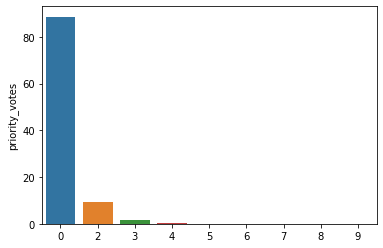

In [6]:
pv_percentage = df['priority_votes'].value_counts(normalize=True) * 100

sns.barplot(x=pv_percentage.index, y=pv_percentage)

pv_percentage


In [7]:
df = df[df['priority_votes'] != 0]

print(f"Dataset len: {len(df)} rows")

pv_percentage = df['priority_votes'].value_counts()

pv_percentage


Dataset len: 18810 rows


2    15575
3     2354
4      679
5      127
6       54
7       11
8        6
9        4
Name: priority_votes, dtype: int64

c:\users\thais\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


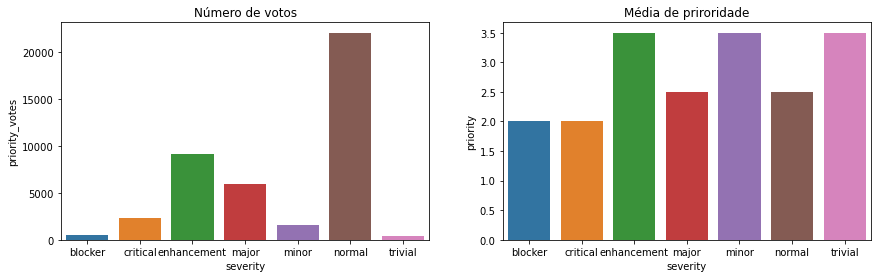

In [8]:
sev_pv_total_votes = df.groupby('severity')['priority_votes'].sum()
sev_p_median = df.groupby('severity')['priority'].median()

df['severity'].value_counts()


fig, ax =plt.subplots(1,2)
sns.barplot(x=sev_pv_total_votes.index, y=sev_pv_total_votes, ax=ax[0]).set_title("Número de votos")
sns.barplot(x=sev_p_median.index, y=sev_p_median, ax=ax[1]).set_title("Média de priroridade")
fig.subplots_adjust(right=2)
fig.show()

## NLP on short description

In [9]:
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

for index, row in df.iterrows():
    text = row['short_desc']

    word_punct_token = WordPunctTokenizer().tokenize(text)

    clean_token=[]
    for token in word_punct_token:
        token = token.lower()
        # remove any value that are not alphabetical
        new_token = re.sub(r'[^a-zA-Z]+', '', token) 
        # remove empty value and single character value
        if new_token != "" and len(new_token) >= 2: 
            vowels=len([v for v in new_token if v in "aeiou"])
            if vowels != 0: # remove line that only contains consonants
                clean_token.append(new_token)


    # Get the list of stop words
    stop_words = stopwords.words('english')
    # add new stopwords to the list
    stop_words.extend(["could","though","would","also","many",'much'])

    # Remove the stopwords from the list of tokens
    tokens = [x for x in clean_token if x not in stop_words]
    print(tokens)

    if tokens:
        df.loc[index,'short_desc_keywords'] = ' '.join(tokens)
    else:
        df.loc[index,'short_desc_keywords'] = ''


['filter', 'projects', 'versions', 'gcixh']
['actionsets', 'user', 'customizable', 'menus', 'toolbars']
['editor', 'ec', 'editing', 'file', 'outside', 'workspace', 'gkozs']
['ec', 'need', 'mime', 'type', 'generator']
['java', 'reconciler', 'works', 'strange', 'duplicate', 'methods', 'gezg']
['invalid', 'references', 'ipath', 'getdevice', 'potentially', 'breaking', 'linux', 'gur']
['propertiesview', 'property', 'sheet', 'label', 'provider', 'limited', 'ability']
['accessibility', 'problems']
['cvsignore', 'ignore', 'resources', 'previously', 'released', 'gjuul']
['display', 'view', 'contents', 'restored', 'properly']
['property', 'sheet', 'breakpoint', 'glqe']
['exception', 'doubleclicking', 'breakpoint']
['breakpoints', 'method', 'declarations', 'installed', 'ghowc']
['verification', 'error']
['recently', 'launched', 'programs', 'contains', 'program', 'arguments', 'givcw']
['perspective', 'specific', 'launcher', 'filtering', 'giyjxh']
['launcher', 'binding']
['evaluate', 'actions', 'di

['externaltools', 'selecting', 'building', 'individual', 'targets', 'ant', 'scripts']
['new', 'builder', 'invalid', 'error', 'found', 'declared', 'package', 'match', 'expected', 'package']
['tasks', 'view', 'filter', 'settings', 'remembered', 'startup']
['exception', 'built', 'state', 'scrapbook']
['sub', 'folders', 'dot', 'visible', 'packages', 'view', 'gcoh']
['search', 'page', 'offer', 'case', 'sensitivity', 'check', 'box']
['newly', 'added', 'resources', 'cannot', 'checked']
['walkback', 'workspace', 'opened']
['npe', 'opening', 'view']
['npe', 'clicking', 'catch', 'button']
['coredump', 'debugger', 'step', 'action']
['source', 'attachment', 'jar', 'work']
['current', 'line', 'debugger', 'start', 'center', 'source', 'editor', 'gethj']
['plugin', 'dependencies', 'tab', 'scroll', 'using', 'mouse', 'scroll', 'wheel']
['pattern', 'breakpoints', 'failing']
['weird', 'tab', 'order', 'create', 'project', 'wizard']
['statusline', 'writeable', 'readable']
['busy', 'cursor', 'open', 'selecti

['make', 'sure', 'future', 'store', 'project', 'reference', 'types']
['eclipse', 'abends', 'new', 'wizard', 'uncaught', 'error', 'gkqo']
['refactoring', 'renaming', 'array', 'field', 'change', 'name', 'field']
['code', 'assist', 'class', 'folders', 'work']
['imemento', 'getstring', 'string', 'removes', 'formatting']
['unable', 'discover', 'recover', 'deleted', 'files']
['reorganize', 'methods', 'source', 'file', 'outline', 'view']
['preferences', 'preference', 'page', 'lost', 'preference', 'dialog', 'closed', 'gil']
['decorators', 'appear', 'java', 'projects', 'packages', 'view']
['autodetected', 'standard', 'jre', 'entry', 'disappears', 'running', 'custom']
['wsad', 'request', 'open', 'java', 'editor', 'framework']
['ui', 'update', 'get', 'clean', 'copy', 'revert', 'back', 'repository', 'edition']
['project', 'dependencies', 'updated', 'classpath', 'file', 'read', 'glevo']
['field', 'reference', 'search', 'lookup', 'mode']
['javaelementdelta', 'reports', 'changed', 'class', 'files', '

['compare', 'bird', 'eye', 'view', 'context', 'menu', 'cool']
['openexternaljavadoc', 'action', 'call', 'findelement', 'jar']
['javadoc', 'wizard', 'ant', 'file', 'generated', 'already', 'exists']
['javadoc', 'wizard', 'npe', 'editing', 'stylesheet', 'field']
['deadlock', 'startup', 'processing', 'breakpoints']
['problems', 'project', 'location', 'eclipse', 'startup']
['ensure', 'launcher', 'launch', 'selected', 'project', 'closed']
['ui', 'refresh', 'view', 'using', 'source', 'level', 'compare', 'gifth']
['cursor', 'source', 'mask', 'flip', 'flopped']
['console', 'scrolling', 'jerky']
['simple', 'project', 'missing', 'new', 'wizard']
['logging', 'exceptions']
['capability', 'infinite', 'loop', 'configurable', 'project', 'wizard']
['exception', 'opening', 'javadoc', 'wizard']
['java', 'browsing', 'available']
['add', 'javadoc', 'comment', 'adds', 'non', 'java', 'doc', 'comments']
['delete', 'key', 'nothing', 'default', 'package']
['refactoring', 'read', 'files']
['ui', 'multiple', 'rou

['outline', 'toolbar', 'items', 'views', 'get', 'focus', 'way', 'easily']
['multi', 'select', 'failure', 'repository', 'view']
['save', 'file', 'confusion', 'synchronize', 'view']
['creation', 'new', 'class', 'fails', 'error', 'syntax', 'template']
['view', 'usability', 'opening', 'new', 'view', 'cumbersome']
['editor', 'scrolling', 'notebook', 'tabs', 'considered', 'harmful']
['npe', 'reordering', 'editors']
['npe', 'opening', 'multipage', 'editor', 'multipageeditorpart', 'isdirty', 'check', 'null']
['tons', 'extra', 'menu', 'items']
['memory', 'errors', 'bring', 'eclipse']
['migration', 'closed', 'project', 'hide', 'lose', 'data']
['filter', 'working', 'set', 'details', 'dialog', 'use', 'workbench', 'decorators']
['npe', 'restoring', 'typehierarchy']
['error', 'evaluating', 'public', 'class']
['storagedocumentprovider', 'creates', 'status', 'object', 'null', 'plugin', 'id']
['npe', 'viewpane', 'drawgradient', 'restoring', 'workspace']
['deadlock', 'exiting', 'workspace']
['disallow',

['read', 'state', 'build', 'properties', 'file', 'cached']
['properties', 'dialog', 'project', 'menu', 'missing', 'properties', 'menu', 'item']
['view', 'add', 'cvsignore', 'appear', 'advanced', 'mode']
['externaltools', 'clicking', 'output', 'open', 'resource']
['jdtcompileradapter', 'understand', 'extdirs']
['termination', 'attepmting', 'run', 'update', 'manager']
['externaltools', 'improvements', 'ant', 'development', 'ui']
['editormgmt', 'activate', 'editor', 'set', 'focus', 'editor']
['npe', 'closing', 'eclipse']
['ant', 'console', 'shimmers']
['error', 'log', 'enabling', 'automatic', 'build', 'preference']
['leak', 'outline', 'hangs', 'onto', 'registered', 'menus']
['missing', 'icons', 'launch', 'config', 'creation', 'tabs']
['ant', 'build', 'problem', 'stable', 'build']
['review', 'ant', 'console', 'font', 'preference']
['externaltools', 'ant', 'preference', 'page', 'details']
['add', 'bookmark', 'action', 'disabled', 'editor']
['missing', 'icon', 'resource', 'working', 'set']
[

['outliner', 'focus', 'causes', 'select', 'causes', 'horizontal', 'scroll']
['resourceexception', 'closed', 'projects', 'workspace']
['nullpointerexception', 'preferences', 'dialog', 'hover', 'select']
['externaltools', 'ant', 'script', 'cancelation', 'better', 'handled']
['search', 'missing', 'accelerator', 'definition']
['smoke', 'deleting', 'javadioc', 'ed', 'method', 'messes', 'indenting']
['present', 'exception', 'closing', 'java', 'editor', 'outside', 'classpath']
['key', 'bindings', 'emacs', 'cut', 'text', 'clipboard']
['selecting', 'external', 'builders', 'page', 'project', 'properties', 'causes', 'npe']
['add', 'update', 'manager', 'log', 'info', 'new', 'service', 'support', 'dump']
['copy', 'stack', 'work']
['array', 'bounds', 'exception', 'coolbarmanager']
['tooltip', 'infopop', 'displayed', 'simultaneously']
['npe', 'workbenchpage', 'requestactivation']
['new', 'welcome', 'page', 'presentation']
['search', 'words', 'highlighted']
['ant', 'graphic', 'used', 'external', 'tool

['repository', 'view', 'action', 'operates', 'items', 'selected']
['selection', 'new', 'elements', 'packages', 'view', 'annoying']
['coolbar', 'layout', 'messed']
['entire', 'zipfiles', 'content', 'sent', 'prior', 'computing', 'synchronization', 'view', 'content']
['icons', 'tollbar', 'retaining', 'locked', 'positions']
['open', 'help', 'java', 'editor']
['error', 'dialog', 'invalid', 'webdav', 'site', 'freezes', 'entire', 'ide']
['status', 'line', 'update', 'selecting', 'task', 'task', 'list']
['team', 'menu', 'disapear', 'hierarchy', 'packages', 'view']
['breakpoint', 'markers', 'appear', 'source', 'selected', 'elements', 'beong', 'shown']
['incompatiblethreadstateexception', 'attempting', 'pause', 'remote', 'launch']
['hover', 'help', 'stops', 'working', 'mousing', 'end', 'file']
['preferences', 'working', 'import', 'export']
['team', 'commit', 'refactor', 'leaves', 'old', 'new', 'files', 'repository']
['eclipse', 'detect', 'use', 'repository', 'prefix']
['properties', 'page']
['coo

['null', 'pointer', 'exception', 'editorworkbook', 'java']
['incorrect', 'japanese', 'font', 'used']
['navigation', 'text', 'drag', 'drop']
['propertiesview', 'incorrect', 'setpropertyvaluecommand', 'undo', 'implementation']
['delete', 'confirmation', 'prompts', 'inconsistent', 'navigator', 'view']
['team', 'examples', 'pessimistic', 'filesystem', 'provider', 'prompt', 'add', 'files', 'control']
['perspectives', 'npe', 'attempting', 'change', 'perspectives']
['ui', 'like', 'easy', 'way', 'synchronize', 'entire', 'workspace', 'one', 'operation']
['drop', 'names', 'different', 'nightly', 'integration', 'builds']
['add', 'jar', 'file', 'debug', 'attribute', 'checking', 'build', 'process']
['code', 'manipulation', 'suggestion', 'hotkey', 'comment', 'uncomment']
['resources', 'code', 'unnecessarily', 'turns', 'autobuild']
['java', 'formatter', 'enhancements']
['preferences', 'like', 'optionally', 'see', 'workspace', 'location', 'window', 'title', 'bar']
['tab', 'titles', 'read', 'jaws']
['c

['logfile', 'option', 'ant', 'doesnt', 'seem', 'work']
['update', 'ant', 'pages', 'dev', 'eclipse', 'org']
['error', 'logged', 'three', 'times']
['editor', 'pinned', 'editors', 'restored', 'pinned']
['extensions', 'feature', 'requires', 'plugin', 'requires', 'behave', 'differently']
['ui', 'nullpointerexception', 'connecting', 'repository']
['logfile', 'created', 'correct', 'location', 'path', 'fully', 'specified']
['extract', 'interface', 'incorrect', 'interface', 'created', 'extracted', 'methods', 'use', 'extracted', 'interface']
['viewers', 'npe', 'showing', 'new', 'view']
['function', 'keys', 'must', 'pressed', 'twice']
['platform', 'specific', 'shell', 'resize', 'behaviour']
['ui', 'tree', 'display', 'resource', 'history']
['contributions', 'setactivepage', 'call', 'multipageeditoractionbarcontributor', 'sometimes', 'sends', 'null', 'ieditorpart']
['ui', 'view', 'avoid', 'auto', 'merging', 'text', 'files', 'conflicts']
['ui', 'committing', 'unchanged', 'file', 'update', 'decorator

['instruction', 'pointer', 'showing', 'source', 'selected', 'element']
['shift', 'right', 'undo', 'restoring', 'properly']
['wrong', 'line', 'number', 'attribute']
['outline', 'updated', 'constant', 'rename']
['help', 'context', 'ids', 'external', 'tools']
['problem', 'snippet', 'java', 'model', 'presentation', 'loaded']
['refactoring', 'wizard', 'brings', 'package', 'explorer', 'flicker', 'refactoring']
['refactoring', 'touches', 'files', 'involved', 'action', 'refactiong']
['missing', 'option', 'new', 'local', 'quick', 'assist', 'quick', 'fix']
['code', 'assist', 'popup', 'closing', 'switching', 'apps']
['exception', 'renaming', 'source', 'folder', 'refactoring']
['quick', 'assist', 'quick', 'assist', 'offer', 'convert', 'throws', 'catch']
['preferences', 'need', 'way', 'bring', 'code', 'particular', 'page', 'node', 'preference', 'dialog']
['key', 'bindings', 'keybinding', 'setting', 'workbench', 'editors']
['external', 'tool', 'builder', 'configuration', 'buttons', 'disabled']
['reb

['runtime', 'launch', 'config', 'source', 'lookup']
['hot', 'code', 'replace', 'drops', 'enter', 'changed', 'method']
['show', 'source', 'selected', 'element', 'makes', 'eclipse', 'crash']
['decorators', 'decorator', 'thread', 'died']
['workbench', 'nullpointerexception', 'org', 'eclipse', 'ui', 'internal', 'workbenchwindow']
['two', 'builds', 'time', 'one', 'starts', 'logging', 'dos', 'console']
['tasks', 'view', 'support', 'read', 'tasks', 'task', 'list']
['copy', 'paste', 'failed', 'eclipse', 'gedit']
['debug', 'view', 'inconsistent', 'state', 'hitting', 'exception', 'step']
['adding', 'external', 'folder', 'source', 'lookup', 'path', 'via', 'advanced', 'menu', 'enters', 'incorrect', 'path']
['resources', 'npe', 'importing', 'binary', 'plugins']
['tasks', 'adding', 'items', 'takes', 'profiler']
['javadoc', 'location', 'initial', 'value']
['contributions', 'context', 'menu', 'contributions', 'support', 'visibility', 'element']
['improve', 'debug', 'ui', 'plug', 'startup']
['unsatisfi

['tooltip', 'debug', 'run', 'buttons', 'displays', 'debu', 'ru']
['offer', 'deep', 'copy', 'move', 'linked', 'resources']
['contributions', 'duplicate', 'menu', 'items', 'misc']
['show', 'real', 'plugin', 'names']
['globalactions', 'newbookmarkaction', 'deleted']
['add', 'menu', 'setredraw', 'boolean', 'api']
['styledtext', 'wrap', 'display', 'styledtext', 'incorrectly']
['push', 'refactoring', 'dialog', 'details', 'exception']
['offer', 'show']
['double', 'clicking', 'packages', 'viewer', 'expands', 'collapses', 'tree', 'node']
['inspect', 'watch', 'display', 'run', 'line', 'disabled', 'popup', 'menu']
['quickassist', 'wraps', 'lines']
['need', 'function', 'report', 'available', 'features', 'plugins', 'fragments']
['renaming', 'linked', 'source', 'folder', 'copies', 'content']
['switching', 'tabs', 'launch', 'configuration', 'slow']
['moving', 'linked', 'resource', 'onto', 'self', 'deletes', 'linked', 'resource']
['navigator', 'alpha', 'sort', 'order', 'correct']
['push', 'refactoring

['editormgmt', 'associations', 'dynamically', 'registering', 'association']
['disabled', 'breakpoints', 'still', 'rendered', 'enabled']
['refactor', 'extract', 'interface', 'causing', 'exception']
['implementation', 'rework', 'context', 'menu', 'code']
['show', 'work', 'class', 'file', 'jar']
['npe', 'viewing', 'variables', 'debugger']
['organize', 'import', 'second', 'guessing', 'regression']
['signal', 'org', 'eclipse', 'internal', 'os', 'gtkprogressbarpulse', 'native', 'method']
['templates', 'stdout', 'tag', 'intuitive']
['coolbar', 'clips', 'run', 'icon']
['dialogs', 'dialogs', 'sized', 'correctly', 'display', 'dpi', 'changed']
['mac', 'editormgmt', 'associations', 'open', 'resource', 'external', 'program']
['run', 'ant', 'causes', 'classcastexception', 'filesets']
['action', 'sets', 'appear', 'property', 'view']
['compute', 'dependency', 'extent', 'work', 'external', 'plug', 'ins']
['cannot', 'configure', 'javadoc', 'referenced', 'classes']
['ui', 'console', 'line', 'coloring', '

['text', 'context', 'menu']
['unable', 'launch', 'xbootclasspath']
['classpath', 'variables', 'disappear']
['works', 'fields', 'help', 'search']
['inline', 'method', 'refactoring', 'introduce', 'variable', 'needed']
['generate', 'setter', 'produces', 'incorrect', 'code']
['celleditors', 'dialogcelleditor', 'incorrectly', 'displayed', 'tableviewer', 'bug']
['cannot', 'install', 'fix', 'included', 'feature', 'higher', 'version']
['keys', 'preference', 'page', 'table', 'column', 'sized', 'correctly']
['dialogs', 'open', 'resource', 'offers', 'open', 'class', 'files']
['npe', 'selecting', 'javadoc', 'location', 'jar']
['target', 'platform', 'apply', 'long', 'running']
['preferences', 'regression', 'new', 'project', 'open', 'persp', 'preference', 'ignored']
['npe', 'classpath', 'variables', 'page']
['commiting', 'new', 'resources', 'takes', 'long', 'time']
['key', 'bindings', 'leak', 'open', 'close', 'resource', 'pespective']
['eclipse', 'hangs', 'creating', 'new', 'directory']
['eclipse', 

['help', 'missing', 'help', 'index', 'solution']
['automatically', 'show', 'console']
['debugger', 'support', 'roles', 'activities']
['decorators', 'quick', 'file', 'status', 'indicators']
['editorarea', 'dropadapter', 'handling', 'dropdefault', 'correctly']
['refactor', 'fails', 'leaves', 'errors', 'code', 'done', 'format', 'refactoring']
['junit', 'wizard', 'update', 'java', 'build', 'path', 'junit']
['java', 'text', 'editor', 'stops', 'painting', 'throws', 'exceptions']
['plan', 'item', 'add', 'junit', 'support', 'testing', 'plug', 'ins']
['change', 'editorareadropadapter', 'set', 'dropcopy']
['plan', 'item', 'add', 'early', 'support', 'jse', 'features']
['code', 'assist', 'create', 'java', 'class', 'wizard', 'general', 'issue', 'code', 'manipulation']
['registering', 'ijavabreakpointlistener', 'causes', 'breakpoints', 'ignored']
['default', 'auto', 'generated', 'catch', 'block', 'still', 'right', 'refactoring']
['working', 'sets', 'global', 'working', 'sets']
['plan', 'item', 'remo

['exception', 'thrown', 'click', 'lightbulb', 'icon']
['typing', 'internal', 'errors', 'log']
['view', 'shortcut', 'bar', 'flickers', 'adding', 'new', 'project']
['trouble', 'processing', 'events', 'window', 'pop']
['global', 'actions', 'action', 'sets', 'work', 'properly', 'using', 'multiple', 'windows']
['errors', 'using', 'file']
['slow', 'package', 'explorer', 'activation', 'regression']
['progress', 'view', 'npe']
['help', 'print', 'multiple', 'topics']
['editormgmt', 'resource', 'leak', 'working', 'large', 'amount', 'files']
['code', 'generation', 'pref', 'page', 'use', 'table', 'editor', 'code', 'manipulation']
['refactor', 'rename', 'throws', 'stringindexoutofbounds', 'exception']
['key', 'bindings', 'shortcut', 'keys', 'broken']
['editormgmt', 'timebased', 'automatic', 'save', 'editors']
['extract', 'method', 'illegalargumentexception']
['key', 'binding', 'emacs', 'key', 'binding', 'working']
['navigation', 'filtering', 'outline', 'prompter', 'works', 'focus', 'text', 'field']

['contributions', 'plugin', 'context', 'menu', 'run', 'ant', 'item']
['outline', 'slow', 'treeviewer', 'updates']
['problems', 'opening', 'class', 'file', 'editor']
['keybindings', 'missing', 'keybindings', 'context', 'menus']
['drag', 'drop', 'delete', 'existing', 'file']
['rmi', 'classcastexception', 'casting', 'stub']
['formatting', 'error', 'formatting', 'parts', 'java', 'code', 'snippets', 'comment']
['misc', 'annotations', 'gone', 'wild']
['problems', 'view', 'time', 'response', 'debugging', 'slows', 'several', 'perspectives', 'opened']
['patchattached', 'watch', 'edit', 'team', 'edit', 'set', 'temporary', 'watch']
['keybindings', 'alt', 'arrow', 'keybindings', 'work']
['exception', 'generating', 'makefile', 'managed', 'make']
['painting', 'iae', 'documentadapter', 'getlineatoffset', 'code', 'formatting']
['subdir', 'dep', 'updated', 'saving', 'including', 'file', 'included']
['cannot', 'change', 'build', 'properties', 'renaming', 'project']
['show', 'hierarchy', 'show', 'outline

['commands', 'request', 'show', 'context', 'menu']
['contributions', 'updating', 'need', 'hooks', 'control', 'enablement', 'global', 'menu', 'items']
['dialogs', 'errordialog', 'jface']
['commandmgmt', 'source', 'menu', 'entries', 'disabled']
['deferredtreecontentmanager', 'hard', 'reuse']
['evalution', 'adding', 'semicolon', 'breakpoint', 'condition', 'causes', 'compilation', 'error']
['typing', 'caret', 'home', 'positionning', 'comment', 'optionnal']
['code', 'comments', 'preference', 'section', 'blank']
['editormgmt', 'rework', 'editor', 'concept', 'allow', 'iadaptable']
['coolbar', 'order', 'tool', 'bar', 'buttons', 'reversed']
['celleditors', 'editable', 'table', 'mouse', 'selection', 'behaviour', 'strange', 'refactoring', 'misc']
['jobs', 'eventloopprogressmonitor', 'use', 'exception', 'handler']
['typing', 'paste', 'inserts', 'partial', 'string']
['help', 'like', 'un', 'highlight', 'search', 'terms']
['commandmgmt', 'key', 'bindings', 'work']
['menu', 'bar', 'mnemonics', 'work']

['embedded', 'help', 'browser', 'disabled']
['formatting', 'garbled', 'editor', 'formatting', 'code']
['need', 'way', 'find', 'line', 'delimiter', 'type', 'file']
['debug', 'breaks', 'caught', 'exception']
['copyarea', 'image', 'implemented', 'mac']
['test', 'case', 'wizard', 'generates', 'wrong', 'code']
['keybindings', 'work']
['contextmgmt', 'npe', 'switching', 'debug', 'perspective']
['consitent', 'memory', 'problems', 'indexing', 'multiple', 'java', 'libraries']
['editormgmt', 'associations', 'allow', 'pattern', 'matching']
['workbench', 'want', 'choose', 'perspective', 'tool', 'bar', 'location']
['viewmgmt', 'loss', 'space', 'titlebar', 'view', 'alone', 'stacked', 'others']
['external', 'tool', 'builders', 'run', 'background']
['view', 'view', 'object', 'contributions', 'disapear']
['spell', 'checking', 'spell', 'checking', 'java', 'code']
['viewers', 'select', 'based', 'keyboard']
['coolbar', 'dragging', 'cool', 'item', 'new', 'row', 'cool', 'bar', 'resize', 'views']
['eclipse',

['editormgmt', 'close', 'editor', 'take', 'last', 'viewed', 'editor']
['preferences', 'dialogmessagearea', 'image', 'large']
['viewmgmt', 'dropping', 'view', 'place', 'changes', 'size']
['progress', 'errornotificationmanager', 'attempts', 'open', 'dialog', 'workbench', 'shutdown']
['external', 'tool', 'builders', 'need', 'adapt', 'new', 'build', 'story']
['implementation', 'npe', 'opening', 'file', 'reprository', 'view']
['minimization', 'top', 'shell', 'widgets', 'impossible', 'min', 'none', 'pocketpc', 'bbawt']
['keybindings', 'services', 'page', 'needs', 'keybindingservice']
['webapp', 'search', 'advanced', 'search', 'dialog', 'needs', 'select', 'deselect', 'buttons']
['build', 'build', 'menus', 'disable', 'build', 'automatically', 'flag']
['adoptability', 'cannot', 'use', 'variables', 'specify', 'search', 'paths']
['implementation', 'concurrentmodificationexception', 'thrown', 'occasionally', 'idocumentprovider', 'add', 'removeelementstatelistener']
['chinese', 'characters', 'rende

['misc', 'open', 'external', 'file', 'toolbar', 'icon']
['pde', 'refresh', 'correctly', 'id', 'changes', 'plugin']
['search', 'refs', 'loses', 'focus', 'search']
['npe', 'closing', 'editor', 'context', 'menu', 'refactoring']
['delete', 'nukes', 'non', 'alphanum', 'chars']
['deadlock', 'alltypes', 'cache', 'setclasspathcontainer']
['repository', 'access', 'denied']
['import', 'project', 'clears', 'derived', 'flag']
['browser', 'browser', 'mozilla', 'like', 'links', 'img', 'href']
['editormgmt', 'keybinding', 'enabled', 'overwritten', 'subcontext']
['cannot', 'check', 'pde', 'plug', 'ins']
['keybindings', 'losing', 'key', 'bindings', 'debug', 'mode']
['progress', 'progress', 'dialog', 'hiding', 'question', 'dialog']
['basicstackpresentation', 'use', 'viewform']
['override', 'update', 'prompt', 'hidden', 'progress', 'dialog']
['run', 'context', 'menu', 'enabled', 'single', 'selection']
['npe', 'using', 'custom', 'text', 'editor']
['navigation', 'delete', 'deletes']
['java', 'model', 'noti

['editormgmt', 'editorpresentation', 'npe', 'projects', 'closed']
['showitem', 'make', 'item', 'tree', 'visible']
['keybindings', 'keybinding', 'cut', 'work']
['introduce', 'factory', 'misses', 'references', 'depending', 'project']
['pressing', 'enter', 'combo', 'triggers', 'dialog', 'traversal']
['shutdown', 'cancel', 'refresh']
['viewmgmt', 'createpartcontrol', 'called', 'setfocus', 'dispose']
['fetching', 'jobs']
['treeviewer', 'filter', 'bypasses', 'content', 'provider', 'haschildren']
['decorators', 'updating', 'decorators', 'expansion', 'slow']
['api', 'run', 'operations', 'ui', 'thread']
['presentations', 'rpres', 'presentation', 'needs', 'serialize', 'tab', 'order']
['unneeded', 'system', 'println']
['markersview', 'markers', 'view', 'attempting', 'update', 'shutdown']
['progress', 'complete', 'shown', 'progress', 'view']
['javaelementimageprovider', 'getimage', 'almost', 'half', 'label', 'update', 'time']
['launch', 'program', 'waits', 'nonexistant', 'background', 'operation']

['problems', 'regression', 'possible', 'add', 'contributions', 'problemmarker', 'concretemarker', 'without', 'referencing', 'internal', 'classes']
['implementation', 'arrayindexoutofboundsexception', 'bufferedrulebasedscanner']
['tasks', 'task', 'tag', 'creation', 'locked', 'workspace']
['provider', 'plug', 'name', 'plug', 'details']
['contributions', 'ordering', 'incorrect', 'ordering', 'menu', 'items']
['hierarachy', 'compuation', 'dialog', 'pop', 'expensive', 'object', 'case']
['repository', 'location', 'username', 'password', 'contain']
['progress', 'blocking', 'dialog', 'progress', 'use', 'dialog', 'font']
['relengtool', 'version', 'text', 'field', 'get', 'focus']
['relengtool', 'compare', 'shows', 'workspace', 'changes']
['navigator', 'navigator', 'popup', 'causes', 'eclipse', 'hang']
['rename', 'refactoring', 'wizard', 'butchers', 'clipboard']
['projection', 'folded', 'code', 'blocks']
['viewmgmt', 'swtexception', 'outline', 'importing', 'preferences']
['user', 'operation', 'wai

['progress', 'job', 'icon', 'flicker']
['graphic', 'disposed', 'error', 'editor', 'dropdown']
['popup', 'menu', 'size', 'drop', 'editor', 'list']
['presentations', 'perspective', 'bar', 'expand', 'hold', 'new', 'perspectives']
['stack', 'trace', 'shutdown', 'display', 'created', 'shutdown']
['preferences', 'projection', 'use', 'code', 'folding', 'default']
['synchronizemodelprovider', 'causes', 'swtexception', 'widget', 'disposed']
['pde', 'build', 'fails']
['search', 'outofmemory', 'incorrect', 'offsets', 'searching']
['scalability', 'search', 'fails', 'give', 'declarations', 'medium', 'large', 'project']
['feedback', 'information', 'indexing']
['refactoring', 'provide', 'new', 'extract', 'field', 'refactoring']
['null', 'monitor', 'passed', 'jobs']
['misc', 'unable', 'get', 'document', 'content']
['import', 'export', 'cannot', 'fill', 'project', 'name', 'import', 'project', 'wizard']
['presentations', 'regression', 'partstack', 'making', 'assumptions', 'stackpresentation', 'cookie', 

['update', 'install', 'pref', 'page', 'max', 'history', 'configurations', 'prox', 'port', 'validation']
['bidi', 'plan', 'item', 'proposed', 'changes', 'bidi', 'support']
['workbench', 'toolbars', 'ctabitems', 'rendering', 'righttoleft']
['prefs', 'add', 'support', 'change', 'listeners', 'java', 'project', 'options']
['adding', 'import', 'shift', 'locks', 'keyboard', 'editor', 'window']
['way', 'keep', 'last', 'built', 'state', 'handling', 'incrementalprojectbuilder', 'isinterrupted']
['abstractuiplugin', 'getimageregistry', 'usable']
['index', 'indexer', 'use', 'exclusions', 'pattern', 'recursiving', 'folder']
['plan', 'item', 'improve', 'program', 'manipulation', 'infrastructure']
['viewers', 'nullpointerexception', 'updating', 'projects']
['statushandling', 'errordialog', 'details', 'allow', 'one', 'line', 'per', 'istatus', 'object']
['dialogs', 'errordialog', 'resize', 'behaviour', 'improved']
['bidi', 'mirroring', 'context', 'menu', 'implemented', 'extention', 'point']
['templates

['activitymgmt', 'contributions', 'compilationuniteditor', 'leak']
['contributions', 'mpe', 'contributions', 'based', 'active', 'editor', 'duplicates', 'entries', 'multipageeditorparts']
['commands', 'aggressive', 'error', 'reporting', 'action', 'def', 'definitionid', 'command']
['create', 'junit', 'test', 'case', 'add', 'org', 'junit', 'plugin', 'test', 'plugins', 'junit', 'code', 'manipulation']
['editormgmt', 'control', 'new', 'editors', 'opened', 'workbook']
['jse', 'jdi', 'enhancements', 'enums']
['create', 'launch', 'configurations', 'dialog']
['ime', 'mode', 'box', 'overwrites', 'scroll', 'bar', 'gmap']
['progress', 'dialogs', 'dialog', 'small', 'showing', 'details']
['webapp', 'strings', 'cut', 'new', 'search', 'list']
['variables', 'support', 'custom', 'details', 'view', 'widgets']
['java', 'launching', 'project', 'find', 'exported', 'jre', 'dependent', 'project']
['perspectives', 'viewmgmt', 'folder', 'tab', 'indicate', 'current', 'view', 'using', 'multi', 'instance', 'views'

['viewers', 'tableviewer', 'virtualmanager', 'lacks', 'support', 'clear', 'remove']
['propertiesdialog', 'categories', 'property', 'pages']
['incorrect', 'stack', 'frame', 'selected']
['tooltip', 'junit', 'view', 'docked', 'fastview', 'junit']
['store', 'index', 'locations', 'per', 'header']
['external', 'search', 'links']
['search', 'needs', 'away', 'second', 'parse']
['update', 'fails', 'silently']
['preferences', 'need', 'link', 'component']
['open', 'external', 'file', 'dialog', 'support', 'multiple', 'file', 'selection']
['markers', 'error', 'marks', 'vanish']
['commands', 'parameters', 'allow', 'key', 'assignments', 'external', 'tools']
['dialogs', 'open', 'resource', 'allow', 'select', 'deselect', 'projects']
['commands', 'request', 'declare', 'command', 'link', 'editor']
['changes', 'ipathentry', 'apis']
['prefs', 'javaconventions', 'offer', 'compiler', 'options', 'validation', 'api']
['commands', 'parameters', 'provide', 'like', 'command', 'interface']
['npe', 'closing', 'juni

['indexer', 'slow']
['index', 'entries', 'make', 'use', 'path', 'variables']
['import', 'export', 'support', 'bzip', 'file', 'compression', 'archive', 'files']
['workingsets', 'option', 'create', 'working', 'set', 'new', 'project']
['hovering', 'show', 'javadoc']
['bidi', 'eclipse', 'editors', 'except', 'generally', 'used', 'typing', 'english', 'text']
['import', 'export', 'importing', 'existing', 'projects', 'support', 'archive', 'files']
['contributions', 'menus', 'defined', 'multiple', 'plugins', 'always', 'work', 'sort', 'order', 'plugin', 'id']
['encoding', 'support', 'non', 'text', 'files']
['concurrent', 'modification', 'exception']
['console', 'output', 'allow', 'links', 'methods', 'name']
['dialogs', 'title', 'dialog', 'filedialog', 'class']
['viewers', 'virtual', 'tables', 'request', 'updates', 'batches']
['exception', 'breakpoint', 'hangs']
['add', 'deprecate', 'rename', 'refactoring', 'refactoring']
['detachedviews', 'widget', 'disposed', 'using', 'synchronize', 'tool', 'ba

['perspectives', 'ctabfolders', 'created', 'switching', 'perspectives']
['preferences', 'scopedpreferencestore', 'needssaving', 'always', 'returns', 'true']
['misc', 'huge', 'regression', 'javareplaceallwithquickdifftest']
['history', 'history', 'store', 'oldest', 'entry', 'policy', 'enforcement', 'smarter']
['viewers', 'comboviewer', 'internalrefresh', 'slow']
['viewers', 'tableviewer', 'refresh', 'slower', 'setinput']
['actionsets', 'selectionlisteneraction', 'use', 'service', 'efficient']
['workbench', 'workbench', 'avoid', 'reading', 'feature', 'ini', 'speed', 'startup']
['presentations', 'partstack', 'creation', 'slow', 'startup']
['misc', 'markerannotationpreferences', 'unnecessarily', 'reprocesses', 'org', 'eclipse', 'ui', 'editors', 'markerannotationspecification']
['decorators', 'updates', 'done', 'one', 'job', 'per', 'listener']
['long', 'object', 'persisted', 'session', 'properties', 'meta', 'data', 'file']
['memory', 'footprint', 'javadebugoptionsmanager']
['markers', 'imag

['snapshot', 'blocked', 'checkout', 'blocks', 'edit', 'project']
['import', 'export', 'numberformatexception', 'import', 'zip', 'file']
['macro', 'scripts', 'failed']
['internal', 'error', 'occurred', 'retrieving', 'targets']
['create', 'component', 'debug', 'plugins']
['contributions', 'outline', 'view', 'toolbar', 'flashes', 'tab', 'switch']
['compare', 'shows', 'diffs', 'compare', 'complete']
['commands', 'performance', 'perspective', 'switch', 'parameterizedcommand', 'equals']
['typing', 'undo', 'work', 'cases']
['misc', 'illegalstateexception', 'java', 'editor']
['keybindings', 'misc', 'wrong', 'shortcut', 'displayed', 'menu', 'copy', 'using', 'emacs']
['import', 'export', 'able', 'import', 'export', 'using', 'varying', 'filename', 'encoding']
['consoles', 'removed', 'using', 'multiple', 'windows']
['feature', 'details', 'dialog', 'resize', 'strange']
['eclipse', 'hangs', 'shutdown', 'error', 'disposing', 'display']
['workbenchparts', 'opencloseperspectivetest', 'failing']
['dialo

['preferences', 'error', 'messages', 'truncated', 'preferences', 'dialog', 'resize']
['workbenchparts', 'workbench', 'layout', 'returns', 'incorrect', 'size', 'startup']
['progress', 'progress', 'view', 'preferences', 'applied', 'eclipse', 'restart']
['error', 'message', 'used', 'change', 'var', 'value']
['dialogs', 'open', 'resource', 'dialog', 'look', 'like', 'open', 'type', 'dialog']
['refactoring', 'inline', 'inline', 'method', 'fails', 'methods', 'vararg', 'parameter']
['browser', 'cannot', 'open', 'help', 'solaris']
['decorators', 'navigator', 'leak', 'dangling', 'references', 'resourcenavigator']
['content', 'assist', 'stack', 'overflow', 'genericjavatypeproposal']
['preferences', 'dialog', 'resized', 'new', 'pages', 'unable', 'set', 'required', 'size']
['implementation', 'nosuchelementexception', 'annotationmap']
['content', 'assist', 'vararg', 'ellipsis', 'triggers', 'codeassist', 'auto', 'activation']
['decorators', 'forground', 'label', 'decorator', 'working', 'reliable']
['

['misc', 'line', 'delimiters', 'quite', 'right']
['import', 'export', 'default', 'file', 'extension', 'exporting', 'archive', 'file', 'always', 'set', 'zip']
['viewers', 'setselection', 'fails', 'select', 'yet', 'loaded', 'elements', 'virtual', 'table']
['implementation', 'text', 'undos', 'protect', 'broken', 'stack']
['backward', 'compatibility', 'issues']
['component', 'coverage', 'osgi', 'related', 'apis']
['jres', 'native', 'library', 'settings', 'seem', 'disappear']
['workbenchparts', 'maximized', 'editor', 'prevents', 'jumping', 'editors', 'tab', 'groups']
['formatter', 'code', 'formatter', 'like', 'long', 'string', 'assignments']
['code', 'completion', 'read', 'code']
['formatter', 'java', 'code', 'formatter', 'arguments', 'wrapping']
['patches', 'selective', 'patching', 'path', 'improvements']
['misc', 'file', 'saved', 'disk', 'resave', 'editor', 'context']
['silently', 'stoping', 'download']
['implementation', 'npe', 'contentassistant', 'autoassistlistener', 'keypressed']
['li

['dynamicui', 'commands', 'contexts', 'keybindings', 'commands', 'architecture', 'dynamic']
['browser', 'arch', 'internet', 'proxy', 'settings', 'move', 'base']
['encoding', 'support', 'encoding', 'version']
['forms', 'forms', 'reflow', 'correctly']
['detachedviews', 'non', 'closeable', 'view', 'closed', 'detaching']
['dialogs', 'file', 'dialog', 'color', 'dialog', 'linux', 'titles']
['vertical', 'markers', 'disappear']
['bad', 'sizing', 'launchconfigurationsdialog']
['markers', 'problem', 'description', 'appear', 'tooltip', 'icon', 'problem', 'view']
['javadoc', 'warning', 'option', 'missing', 'package', 'info', 'java']
['propertiesdialog', 'cannot', 'open', 'property', 'pages', 'files']
['jface', 'drag', 'split', 'pane', 'divider', 'corners']
['mnemonics', 'programmatically', 'changed']
['progress', 'clients', 'progressmonitorfocusjobdialog', 'runasync', 'cause', 'widget', 'disposed', 'error']
['themes', 'testpushdown', 'failing', 'motif']
['wizards', 'new', 'folder', 'wizard', 'larg

['keybindings', 'preference', 'page', 'allow', 'assigning', 'keys', 'preference', 'pages']
['editor', 'save', 'write', 'disk', 'intermittent']
['keybindings', 'misc', 'replacement', 'commandevent', 'havekeysequencebindingschanged']
['presentations', 'easier', 'minimize', 'views']
['ide', 'select', 'working', 'set', 'clean', 'dialog']
['perspectivebar', 'fastviews', 'able', 'reorder', 'shortcut', 'buttons']
['keybindings', 'keybinding', 'service', 'deactivated', 'reactivated', 'unregister', 'action']
['perspectives', 'customize', 'dialog', 'show', 'description', 'elements', 'gkxajz']
['workbenchparts', 'new', 'api', 'editorpart', 'setinputwithnotify', 'needs', 'clarification']
['heap', 'monitor', 'causes', 'errors', 'tests']
['workbenchparts', 'regression', 'view', 'tab', 'orders', 'lost', 'restart']
['import', 'export', 'import', 'existing', 'projects', 'wizards', 'enhancements', 'duplicate', 'projects']
['workbenchparts', 'event', 'view', 'closed']
['workbenchparts', 'npe', 'dragging'

['content', 'assist', 'npe', 'assert', 'failure', 'content', 'assist', 'debugger']
['contributions', 'action', 'enablement', 'support', 'objectstate']
['patch', 'create', 'patch', 'option', 'ignore', 'line', 'ending', 'differences']
['content', 'assist', 'afe', 'lazyjavacompletionproposal', 'content', 'assis', 'breakpoint', 'condition']
['typing', 'need', 'smart', 'encoding', 'error', 'detection', 'text', 'save']
['cheatsheets', 'java', 'hello', 'world', 'cheatsheet', 'actions', 'working']
['commands', 'handlers', 'failure', 'testselectallhandlersendsselectionevent']
['dialogs', 'activating', 'system', 'menu', 'popupdialog', 'closes', 'popup']
['repo', 'view', 'keyboard', 'shortcut', 'copying', 'repository', 'location', 'clipboard']
['misc', 'opening', 'text', 'editor', 'non', 'text', 'content', 'gives', 'coreexception']
['quick', 'diff', 'unnecessary', 'call', 'documentlinediffer', 'initialize', 'document']
['api', 'ilocalvariable', 'itypeparameter', 'provide', 'methods']
['memory', '

['iresource', 'methods', 'lock', 'workspace']
['parallelize', 'java', 'build', 'process']
['commands', 'handlers', 'key', 'binding', 'availability', 'dependant', 'view', 'focus']
['mpe', 'first', 'page', 'blank', 'upon', 'creation']
['contexts', 'window', 'context', 'stays', 'active', 'find', 'replace', 'dialog', 'open']
['commands', 'handlers', 'opened', 'text', 'java', 'editor', 'leaked', 'due', 'proxykeybindingservice']
['ide', 'clear', 'ui', 'check', 'projects', 'clean']
['content', 'assist', 'several', 'exceptions', 'attempting', 'template', 'completion', 'selection']
['allow', 'use', 'regular', 'expressions', 'file', 'name', 'performing', 'file', 'search']
['jres', 'unable', 'retrieve', 'system', 'properties']
['performance', 'enabling', 'quickdiff', 'bring', 'machine', 'knees']
['preferences', 'content', 'assist', 'preference', 'page', 'issues']
['presentationapi', 'show', 'icons', 'inactive', 'views', 'certain', 'folders']
['preferences', 'want', 'create', 'instanceof', 'workin

['synchronize', 'model', 'expanding', 'cu']
['typing', 'hyperlink', 'presenter', 'must', 'react', 'document', 'changes']
['browser', 'bidi', 'undefined', 'characters', 'browser', 'path', 'line']
['workbenchparts', 'double', 'save', 'prompt', 'view', 'implements', 'isaveablepart']
['workbenchparts', 'overlap', 'tabs', 'toolbar']
['cheatsheet', 'perform', 'working', 'correctly']
['evaluation', 'npe', 'watch', 'expression']
['variables', 'static', 'variables', 'disappeared', 'clicking', 'variable']
['help', 'preindexing', 'per', 'plugin', 'catch', 'non', 'documents']
['hovering', 'polish', 'javadoc', 'hovers']
['api', 'make', 'public', 'constants', 'private', 'edit', 'menu', 'groups']
['mpe', 'getadapter', 'ieditorstatusline', 'class', 'working', 'multipageeditor']
['change', 'sets', 'visibility', 'check', 'consider', 'mode']
['help', 'search', 'index', 'dynamic', 'help', 'function', 'toc', 'entry', 'contrains', 'anchor']
['java', 'structure', 'compare', 'structured', 'compare', 'availabl

['console', 'thread', 'dumps', 'formatted', 'correctly', 'stack', 'trace', 'console']
['navigatorsaveablesservices', 'npes', 'shutdown']
['doc', 'fastviewbar', 'icon', 'update']
['adding', 'library', 'fails', 'contributing']
['interface', 'org', 'eclipse', 'compare', 'internal', 'isavable', 'made', 'public']
['class', 'org', 'eclipse', 'compare', 'internal', 'comparenavigator', 'made', 'public']
['interface', 'org', 'eclipse', 'compare', 'internal', 'inavigatable', 'made', 'public']
['url', 'connections', 'closed', 'properly', 'ip', 'stack', 'hangs']
['next', 'prev', 'working', 'anymore', 'search', 'view']
['change', 'sets', 'comment', 'dialog', 'use', 'comment', 'title']
['launching', 'launchmanager', 'keeps', 'references', 'last', 'resource', 'delta']
['formatter', 'switch', 'statement', 'auto', 'format', 'fails']
['viewers', 'array', 'grow', 'parent', 'visible']
['multipageeditorpart', 'getadapter', 'uses', 'code', 'requires', 'ui', 'thread']
['content', 'assist', 'ijavacompletionpr

['clean', 'refactorings', 'downgrade', 'java', 'source']
['getter', 'setter', 'code', 'template', 'option', 'chained', 'setters']
['workbench', 'back', 'forward', 'history', 'updated', 'class', 'renamed']
['misc', 'support', 'partial', 'project', 'loading']
['eclipse', 'takes', 'extremely', 'long', 'time', 'recover', 'workspace', 'crash']
['mac', 'os', 'support', 'case', 'sensitive', 'file', 'systems']
['javadoc', 'assist', 'code', 'completion', 'javadoc', 'tags', 'comment', 'ended']
['webapp', 'font', 'background', 'changed', 'navigation', 'view', 'pressing', 'refresh', 'system', 'startup']
['deadlock', 'stepping']
['projection', 'bizarre', 'folding', 'behavior']
['stepping', 'debugger', 'loses', 'state', 'must', 'select', 'stack', 'frame', 'thread', 'resume']
['workbenchparts', 'notification', 'closing', 'editor', 'reference']
['misc', 'provide', 'character', 'matching', 'icharacterpairmatcher']
['implementation', 'assertionfailederror', 'documentlinedifferinitializationtest']
['reor

['history', 'view', 'user', 'oriented', 'date', 'formats', 'history', 'view']
['viewers', 'add', 'api', 'deactivate', 'celleditor', 'focuslost']
['rules', 'sticky', 'live', 'annotations', 'overview', 'ruler', 'updated', 'typing']
['search', 'polymorphic', 'matches', 'supertype', 'hierarchy', 'marked', 'potential']
['implementation', 'put', 'rendering', 'related', 'classes', 'one', 'package', 'declare', 'others', 'friends']
['navigation', 'group', 'categories', 'outline', 'view']
['rulers', 'revision', 'becomes', 'sticky', 'unrelated', 'editor']
['bidi', 'styledtext', 'paint', 'selection', 'well', 'mirrored']
['starting', 'wid', 'based', 'eclipse', 'takes', 'approx', 'minutes', 'initial', 'startup']
['jar', 'exporter', 'provide', 'java', 'web', 'start', 'deployment', 'mechanism']
['hang', 'startup']
['compiler', 'null', 'missing', 'null', 'ref', 'warning', 'upon', 'specific', 'case']
['compiler', 'null', 'pattern', 'recognize', 'system', 'exit', 'non', 'returning']
['compiler', 'null', 

['net', 'utils', 'responsive', 'network', 'pushed']
['presentations', 'better', 'tab', 'layout', 'java', 'editor']
['logical', 'structures', 'stepping', 'logical', 'structure', 'expanded', 'results', 'blank', 'labels']
['ide', 'changes', 'opened', 'file', 'outside', 'workspace', 'actually', 'saved']
['change', 'sets', 'select', 'commit', 'multiple', 'commit', 'sets']
['editormgmt', 'external', 'editor', 'allow', 'arguments']
['fieldassist', 'introduce', 'new', 'controldecoration', 'vertical', 'alignment', 'beginning']
['uriutil', 'touri', 'ipath', 'touri', 'string', 'expensive']
['junit', 'run', 'single', 'junit', 'tests', 'junit', 'runner']
['launching', 'widget', 'disposed', 'error', 'launch', 'config', 'window']
['dialogs', 'recording', 'dialog', 'bounds', 'flexible']
['api', 'navigation', 'cannot', 'resolve', 'conflicting', 'hyperlinking', 'directors']
['viewers', 'jface', 'viewers', 'better', 'protected', 'operationcancelexceptions', 'runtimeexceptions']
['extract', 'superclass', 

['forms', 'msaa', 'problems', 'formtext', 'role', 'default', 'action']
['edit', 'screen', 'cheese', 'margins', 'scrolling', 'text', 'compare', 'editor']
['import', 'export', 'error', 'message', 'displayed', 'special', 'characters', 'enetered', 'export', 'file', 'name']
['jres', 'mac', 'always', 'launches', 'system', 'default', 'matter', 'config', 'says']
['plugin', 'prevents', 'save', 'non', 'utf', 'file']
['search', 'search', 'references', 'pure', 'virtual', 'method', 'yields', 'results']
['completion', 'beginning', 'parameter', 'show', 'args']
['viewers', 'jface', 'treeviewer', 'unable', 'show', 'image', 'different', 'columns']
['quick', 'assist', 'invert', 'statement', 'removes', 'parts', 'condition']
['misc', 'put', 'quick', 'fix', 'context', 'menu']
['debug', 'last', 'launched', 'behaves', 'wrong']
['jface', 'regression', 'jface', 'standalone', 'apps', 'work', 'without', 'org', 'eclipse', 'osgi']
['help', 'context', 'context', 'sensitive', 'help', 'loading', 'blocks', 'ui', 'threa

['templates', 'templates', 'view']
['switch', 'another', 'branch', 'version', 'work', 'modified', 'file']
['assist', 'task', 'tag', 'completion', 'comments']
['syntax', 'highlighting', 'task', 'tag', 'coloring', 'assumes', 'tag', 'single', 'word']
['platform', 'force', 'load', 'content', 'label', 'adapters']
['workbenchparts', 'link', 'smooth', 'sash', 'resizing', 'enable', 'animations', 'preference']
['keybindings', 'add', 'keybinding', 'collapse', 'button', 'navigator', 'package', 'explorer']
['create', 'task', 'type', 'type', 'eclipse', 'refreshlocal']
['project', 'sets', 'wizards', 'create', 'wizard', 'importing', 'team', 'project', 'sets']
['repo', 'view', 'ascending', 'descending', 'sorting', 'order', 'repo', 'view']
['provide', 'ant', 'task', 'setting', 'derived', 'bit']
['concurrentmodificationexception', 'internal', 'resources', 'naturemanager']
['info', 'copy', 'resource', 'one', 'branch', 'another', 'file', 'properties', 'shows', 'wrong', 'tag']
['dialogs', 'copy', 'project'

['moving', 'branch', 'tags', 'provide', 'warning']
['handlers', 'conflict', 'occurred']
['templates', 'preferences', 'customizied', 'code', 'templates', 'used', 'project', 'specific', 'settings', 'enable', 'tweaked', 'disabled']
['markers', 'option', 'wordwrap', 'problems', 'view']
['wizards', 'finish', 'change', 'ascii', 'binary', 'nothing', 'comment', 'required']
['api', 'request', 'resource', 'findexistingresourcevariant']
['compiler', 'error', 'message', 'refer', 'constructor', 'instead', 'methods', 'case']
['viewers', 'checkboxtreeviewer', 'setsubtreechecked', 'work', 'well', 'deferred', 'content']
['keybindings', 'doc', 'change', 'cyclepartaction', 'use', 'key', 'bindings', 'dialogs']
['workbench', 'file', 'selector', 'shows', 'hidden', 'files']
['keybindings', 'feature', 'request']
['keybindings', 'key', 'assist', 'shift', 'shows', 'wrong', 'key', 'sequence']
['patch', 'folding', 'patch', 'options', 'apply', 'patch', 'wizard']
['patch', 'indicate', 'offset', 'used', 'match']
['p

['jface', 'consider', 'custom', 'directorydialog', 'windows']
['breakpoints', 'modify', 'breakpoint', 'double', 'click', 'cycles', 'enabled', 'disabled', 'removed']
['breakpoints', 'double', 'click', 'create', 'class', 'load', 'breakpoint', 'creates', 'line', 'breakpoint', 'marker', 'first']
['javadoc', 'avoid', 'javadoc', 'warning', 'non', 'visible', 'references', 'doc', 'comment', 'visible']
['hovering', 'npe', 'browserinformationcontrol']
['navigation', 'annotation', 'type', 'occurrences', 'defined', 'platform']
['projection', 'modify', 'java', 'editor', 'folding', 'support', 'private', 'protected', 'public', 'folding']
['templates', 'template', 'name', 'contains', 'invalid', 'characters']
['workbench', 'zombies', 'ate', 'layout']
['statushandling', 'limit', 'width', 'multiple', 'errors', 'background', 'jobs', 'dialog']
['statushandling', 'errordialog', 'wrap', 'message']
['project', 'set', 'error', 'import', 'team', 'project', 'set', 'aborts', 'import']
['content', 'assist', 'api',

['formatter', 'new', 'javadoc', 'formatter', 'wrongly', 'indent', 'tags', 'description']
['actions', 'open', 'project', 'dialog', 'use', 'filter', 'field']
['internal', 'error', 'occurred', 'updating', 'workspace']
['misc', 'draw', 'vertical', 'lines', 'control', 'flow', 'statements']
['formatter', 'unexpected', 'line', 'split']
['misc', 'take', 'control', 'creators', 'link', 'handling', 'javadochover']
['misc', 'follow', 'javadoc', 'links', 'source', 'attached']
['compiler', 'clearly', 'wrong', 'blank', 'final', 'field', 'error']
['formatter', 'javadoc', 'header', 'footer', 'formatting', 'different']
['hovering', 'start', 'enriching', 'mousedown', 'forward', 'event', 'rich', 'hover']
['proxy', 'gnome', 'library', 'blow', 'eclipse', 'gnome']
['content', 'assist', 'cannot', 'get', 'focus', 'additional', 'info', 'controller', 'widget', 'associated', 'completion', 'proposal', 'popup']
['javadoc', 'org', 'eclipse', 'pde', 'core']
['properties', 'entry', 'needs', 'browseable']
['webapp', 'b

['printing', 'opening', 'editor', 'slow', 'machines', 'see', 'network', 'printers']
['edit', 'add', 'java', 'content', 'assist', 'compare', 'editor']
['misc', 'simplify', 'setup', 'contentassistaction']
['add', 'goto', 'line', 'compare', 'contexts', 'compare', 'editor']
['forms', 'abstracthyperlink', 'check', 'widget', 'disposed', 'calling', 'triggeraccessible']
['templates', 'text', 'selection', 'substitute', 'iterable']
['formatter', 'wraps', 'assignment', 'unnecessarily']
['misc', 'smart', 'insert', 'mode', 'always', 'default']
['forms', 'busyindicator', 'deadlocks', 'ui', 'thread']
['formatter', 'insert', 'space', 'empty', 'braces', 'array', 'initializers', 'ignored', 'without', 'keep', 'empty', 'array', 'initializer', 'one', 'line']
['last', 'character', 'line', 'disappears', 'selecting', 'code', 'end', 'line']
['pull', 'classcastexception', 'performing', 'pull']
['call', 'hierarchy', 'call', 'hierarchy', 'selection', 'provide', 'structural', 'information']
['editormgmt', 'mpe', '

['launching', 'shared', 'launch', 'configurations', 'displayed', 'favorites', 'importing', 'opening', 'containing', 'project']
['plan', 'extensible', 'execution', 'environments']
['commands', 'new', 'apis', 'iworkbenchcommandconstants', 'missing', 'separators']
['commands', 'services', 'ui', 'workbench', 'provided', 'factories', 'npe', 'dialog']
['copy', 'paste', 'file', 'name', 'one', 'another', 'problematic']
['jar', 'exporter', 'ant', 'file', 'produced', 'export', 'runnable', 'jar', 'contains', 'absolute', 'paths', 'instead', 'relative', 'workspace']
['compare', 'common', 'navigator', 'duplicate', 'changes', 'model', 'compare', 'folder', 'source', 'folder']
['launching', 'ok', 'button', 'disabled', 'select', 'preferred', 'launcher', 'dialog']
['accessibility']
['inline', 'causes', 'compile', 'error', 'inlining', 'method', 'returns', 'constant', 'value', 'called', 'constructor']
['viewers', 'exception', 'widget', 'disposed', 'using', 'tableviewer', 'update', 'previously', 'filtered',

['apt', 'uses', 'lot', 'memory']
['export', 'jar', 'skips', 'last', 'line', 'manifest']
['block', 'selection', 'shift', 'left', 'right', 'block', 'selection']
['markers', 'extra', 'column', 'show', 'items', 'type', 'section', 'filter', 'dialog']
['help', 'system', 'extensibility']
['build', 'anywhere']
['support', 'win', 'version', 'eclipse', 'windows']
['support', 'ubuntu']
['flexible', 'resources']
['api', 'tools', 'usage', 'scan', 'improvements']
['focus', 'compatibility']
['patch', 'enhancements']
['debug', 'launch', 'enhancements']
['add', 'support', 'java', 'se', 'features']
['api', 'want', 'specify', 'target', 'directory', 'project', 'set', 'import']
['bidi', 'improvements']
['javadoc', 'wizard', 'javadoc', 'source']
['commands', 'handlers', 'handle', 'state', 'changes', 'commandlegacyactionwrapper']
['introduce', 'singleton', 'refactoring', 'refactoring']
['implementation', 'textviewer', 'viewerstate', 'connect', 'sets', 'freverseselection', 'improperly']
['implementation', 'st

['early', 'call', 'modify', 'bundle', 'root', 'leaves', 'workspacepluginmodelmanager', 'un', 'initialized']
['validate', 'feature', 'based', 'launch', 'config', 'consider', 'application', 'plug', 'requirement']
['regression', 'ant', 'launch', 'configs', 'run', 'separate', 'jre', 'default']
['regressions', 'introduced', 'saveablescompareeditorinput']
['preferences', 'syntax', 'highlighting', 'create', 'mechanism', 'determine', 'config', 'settings', 'affecting', 'appearance', 'given', 'piece', 'text']
['dialogs', 'save', 'dialog', 'allow', 'creation', 'new', 'project', 'folder']
['moving', 'interface', 'class', 'different', 'package', 'change', 'package', 'statement']
['synchronize', 'view', 'duplicate', 'mnemonic']
['switching', 'configs', 'typing', 'name', 'field', 'slow']
['package', 'explorer', 'working', 'sets', 'working', 'set', 'order', 'lost', 'non', 'visible', 'working', 'sets']
['performance', 'opening', 'slow']
['save', 'participant', 'collision']
['installing', 'software', 's

['compiler', 'null', 'false', 'positive', 'null', 'reference', 'boolean', 'logical']
['npe', 'batchfilerimpl', 'getresource']
['webapp', 'ie', 'browser', 'help', 'working', 'sets', 'dialog', 'trim', 'problems']
['working', 'sets', 'clean', 'workingsetdropadaptertest']
['wrong', 'ordering', 'elements', 'workingsetmodel', 'fallworkingsets']
['webapp', 'resizing', 'help', 'window', 'changes', 'size', 'contents', 'pane']
['get', 'rid', 'dead', 'code', 'warnings', 'tests']
['rename', 'quick', 'fix', 'undoing', 'renamecompilationunitchange', 'changes', 'initial', 'file', 'contents']
['webapp', 'eclipse', 'infocenter', 'using', 'saving', 'search', 'scope']
['colors', 'fonts', 'preference', 'page', 'reset', 'broken']
['reorg', 'quick', 'fix', 'undoing', 'move', 'package', 'proposal', 'changes', 'initial', 'file', 'contents']
['navigation', 'click', 'continue', 'must', 'jump', 'label']
['javabreakpointconditioneditor', 'update', 'changed', 'fields']
['review', 'performance', 'results']
['pressi

['accessibility', 'run', 'debug', 'configuration', 'dialog', 'duplicate', 'mnemonics']
['managedbuild', 'error', 'parsers', 'titles', 'error', 'parser', 'tab', 'couple', 'removed']
['managedbuild', 'changing', 'header', 'dependent', 'files', 'another', 'project', 'get', 'rebuilt']
['test', 'eclipse', 'bug', 'works']
['search', 'search', 'tasks', 'indistinguishable', 'progress', 'view']
['search', 'closing', 'search', 'view', 'mid', 'search', 'causes', 'error']
['search', 'search', 'giving', 'inconsistent', 'results']
['closing', 'opening', 'project', 'causes', 'null', 'appear', 'makefile']
['search', 'open', 'declaration', 'action', 'causes', 'npe', 'paths', 'configured']
['search', 'selection', 'search', 'class', 'find', 'references']
['managed', 'build', 'renaming', 'projects', 'causes', 'includes', 'branch', 'disappear', 'projects', 'view']
['search', 'error', 'opening', 'file', 'closed', 'project', 'search', 'view']
['eclipse', 'crash', 'sles', 'beta']
['scanner', 'macro', 'expansi

['search', 'java', 'project', 'scope', 'work', 'expected', 'gijup']
['code', 'formatter', 'enhancement', 'giyhqr']
['need', 'ijavaelement', 'getunderlyingresource', 'exists', 'test']
['api', 'provide', 'api', 'formatting', 'source', 'gjiwcf']
['api', 'provide', 'api', 'scanning', 'gjiwct']
['api', 'provide', 'api', 'source', 'element', 'parsing', 'gjiwd']
['api', 'provide', 'api', 'running', 'batch', 'compiler', 'gjiwdp']
['markers', 'build', 'path', 'updated', 'build']
['performance', 'matchlocator', 'prune', 'unused', 'asts', 'resolving', 'gjybou']
['searchpatter', 'createpattern', 'work', 'unicodes']
['name', 'qualified', 'ambiguousname', 'expressionname']
['binc', 'adding', 'string', 'field', 'name', 'string', 'field', 'superclass', 'gkmho']
['binc', 'overriding', 'instance', 'class', 'methods', 'gkuc']
['binc', 'invoke', 'overriding', 'class', 'methods', 'gkugq']
['binc', 'detection', 'incompatibleclasschangeerror', 'gkvca']
['binc', 'new', 'field', 'less', 'accessible', 'old', 'o

['set', 'bootclasspath', 'options', 'geuc']
['creating', 'class', 'overwrites', 'existing', 'file', 'gez']
['refactoring', 'comments', 'included', 'ranges', 'astnodes', 'gey']
['find', 'replace', 'search', 'view', 'geqb']
['highlighting', 'find', 'replace', 'matches', 'geqj']
['double', 'click', 'internal', 'jar', 'gefyot']
['need', 'way', 'create', 'new', 'method', 'segmented', 'editor', 'gelwc']
['operations', 'available', 'external', 'jars', 'packages', 'view', 'gexy']
['two', 'error', 'messages', 'shown', 'specified', 'geh']
['change', 'syntax', 'colors', 'gei']
['show', 'packages', 'view', 'nothing', 'gelpj']
['add', 'variable', 'handle', 'multiple', 'selections', 'gejtr']
['hierarchy', 'view', 'without', 'method', 'list', 'gempk']
['package', 'view', 'ignores', 'read', 'property', 'gemtr']
['outline', 'view', 'settings', 'per', 'file', 'instead', 'per', 'view', 'instance', 'gklmo']
['perf', 'java', 'ui', 'loading', 'profile', 'gejxr']
['search', 'find', 'folders', 'gept']
['synta

['key', 'used', 'several', 'places', 'gie']
['code', 'assist', 'work', 'source', 'class', 'files', 'gieerr']
['deadlock', 'adding', 'project', 'workspace', 'giei']
['attach', 'source', 'dialog', 'confusing', 'gietm']
['reconciling', 'thread', 'per', 'editor', 'gihuzf']
['hoverhelp', 'errors', 'work', 'correctly']
['review', 'refactoringsearchengine', 'gikxu']
['review', 'packages', 'refactoring', 'ui', 'need', 'rework', 'gikao', 'refactoring']
['jarexporter', 'causes', 'gilqd']
['comment', 'method', 'outliner']
['refactoring', 'framework', 'want', 'create', 'wizard', 'user', 'input', 'page', 'gitve']
['ec', 'javadoc', 'hoverhelp', 'prettier', 'givmh']
['packageviewer', 'refreshes', 'givwa']
['launcher', 'progress', 'build', 'completed', 'gjmay']
['preference', 'persist', 'expansion', 'state', 'trees', 'giykur', 'package', 'explorer']
['source', 'attachment', 'wizard', 'variable', 'classpath', 'entries', 'correct']
['new', 'source', 'folder', 'ignores', 'case', 'gjo']
['organize', 'impo

['javahotcodereplacemanager', 'added', 'early', 'resource', 'change', 'listener']
['message', 'argument', 'hint', 'successfull', 'codeassist']
['ec', 'link', 'type', 'hierarchy', 'input', 'active', 'editor']
['java', 'formatter', 'preferences', 'else', 'sample', 'backwards']
['breakpoints', 'work', 'class', 'native', 'methods']
['refactoring', 'incorrect', 'extractmethod', 'conditional', 'return', 'loop']
['non', 'se', 'jre', 'supported', 'pjava', 'personal', 'java']
['assign', 'key', 'content', 'assist']
['cannot', 'add', 'two', 'folders', 'name', 'diff', 'projects', 'build', 'path', 'java', 'project']
['want', 'able', 'edit', 'classpath', 'entries', 'wizard']
['npe', 'searching', 'references', 'jar']
['apply', 'patch', 'dialog', 'radio', 'selection']
['apply', 'patch', 'dialog', 'needs', 'indicate', 'project']
['npe', 'socketutil']
['problems', 'importing', 'jar', 'file']
['walkback', 'text', 'delete', 'save', 'java', 'editor']
['debugger', 'source', 'lookup', 'page', 'claims', 'proj

['surround', 'catch', 'block', 'throws', 'npe']
['adding', 'jre', 'dialog', 'said', 'javaruntimesetting', 'setting', 'class', 'path', 'setting', 'class', 'path']
['open', 'type', 'hierachy', 'provides', 'confusing', 'hint']
['add', 'variable', 'associated', 'jar', 'file', 'build', 'path']
['rename', 'foo', 'plugin', 'java', 'crashes']
['interface', 'methods', 'marked', 'abstract']
['jdi', 'timeout', 'exception', 'debugger']
['classcastexception', 'move']
['outline', 'view', 'wrong', 'spelling', 'add', 'javdoc', 'comment']
['red', 'shown', 'editor', 'tab', 'read', 'java', 'files']
['missing', 'resource', 'string', 'javaruntime', 'settingjreclasspathvariables']
['internal', 'error', 'revert']
['override', 'methods', 'handle', 'unicodes']
['rebuild', 'project', 'action', 'compiling', 'java', 'source', 'files']
['leverage', 'new', 'action', 'enablement', 'visibility', 'support']
['incompatible', 'thread', 'state', 'running', 'test', 'suite']
['add', 'filter', 'step', 'filtering', 'broken']

['npe', 'properties', 'page']
['build', 'time', 'jre', 'assignment']
['junit', 'exception']
['junit', 'pref', 'page', 'support', 'multi', 'selection', 'list']
['cce', 'coping', 'project', 'clipboard']
['java', 'doc', 'pref', 'page', 'guess', 'javadoc', 'exe', 'location']
['junit', 'view', 'offer', 'pane', 'reorientation', 'junit']
['modifying', 'ctions', 'enabled', 'read', 'java', 'elements']
['illegalarg', 'exception', 'edtior', 'cut', 'outline', 'view']
['java', 'browsing', 'stream', 'views', 'flushed']
['java', 'browsing', 'projects', 'view', 'flushed', 'creating', 'new', 'java', 'project']
['junit', 'wizard', 'error', 'messages', 'retrievied', 'lower', 'layers', 'used']
['npe', 'javaruntime', 'getdefaultvminstall']
['outliner', 'complains', 'non', 'existing', 'package', 'fragment', 'roots']
['template', 'converted', 'single', 'compilation', 'unit', 'generation']
['javadoc', 'wizard', 'extra', 'javadoc', 'options', 'persisted']
['junit', 'wizard', 'package', 'name', 'validation']
['

['npe', 'opening', 'editor', 'plugins', 'disabled']
['labels', 'checkedtreeselectiondialog', 'localized']
['extract', 'temp', 'incorrect', 'anonymous', 'types']
['rename', 'temp', 'incorrectly', 'dissallowed']
['launch', 'configuration', 'dialog', 'issues']
['read', 'write', 'updated', 'focus', 'change']
['eclipse', 'crash', 'code', 'java', 'file']
['compiler', 'fooled', 'extra', 'interface', 'methods']
['refactoring', 'extract', 'local', 'adds', 'incorrect', 'import']
['editor', 'preference', 'destroys', 'context']
['refactoring', 'read', 'files', 'gives', 'bad', 'results']
['add', 'exception', 'breakpoint', 'dialog', 'mimic', 'open', 'type', 'changes']
['bidi', 'java', 'editor', 'bad', 'display', 'adjacent', 'hebrew', 'arabic', 'syntactic', 'units']
['java', 'browser', 'restore', 'selection']
['non', 'existing', 'folders', 'shown', 'newjavaprojectwizardpage']
['npe', 'selecting', 'editor']
['dead', 'branches', 'package', 'project', 'hierarchy', 'view']
['javadoc', 'wizard', 'default'

['launcher', 'ui', 'discovering', 'main', 'class', 'let', 'type', 'completion', 'misc']
['surround', 'catch', 'use', 'formatting', 'configuration']
['linkedpositionui', 'reference', 'colorred']
['running', 'debug', 'view', 'java', 'perspective', 'several', 'problems']
['completion', 'javadoc', 'see', 'tags']
['class', 'template', 'refers', 'workbench', 'menu']
['move', 'cu', 'ref', 'update', 'broken']
['marks', 'overview', 'ruler', 'change', 'cursor', 'mouse']
['java', 'working', 'set', 'search', 'actions', 'fail', 'ok', 'pressed', 'working', 'set', 'selected']
['linux', 'classpath', 'variables', 'preference', 'page', 'top', 'line', 'cut']
['tool', 'insert', 'leading', 'new', 'line', 'properties', 'refactoring']
['java', 'source', 'attachment', 'preference', 'page', 'text', 'large', 'amount', 'white', 'space']
['single', 'launching', 'problematic', 'ambigious', 'file', 'type']
['inconsistencies', 'dependant', 'options', 'preference', 'pages']
['opening', 'two', 'editors', 'quickly', 'c

['missing', 'package', 'org', 'eclipse', 'ui', 'actions']
['indication', 'filters']
['launch', 'config', 'tabs', 'appear']
['nativemethodexception', 'line', 'location', 'request']
['filters', 'description', 'addition', 'name']
['exception', 'removing', 'search', 'results']
['strange', 'organize', 'import', 'behavior']
['npe', 'managemethodbreakpointactiondelegate']
['must', 'check', 'null', 'uses', 'iworkbenchpartreference', 'getpart']
['missing', 'message', 'missing', 'jar']
['arrayindexoutofboundsexception', 'abstractdocument']
['filter', 'dialog', 'uses', 'mnemonic', 'twice']
['next', 'previous', 'error', 'selects', 'markers']
['use', 'progress', 'dialog', 'stead', 'status', 'line']
['reconcile', 'java', 'views', 'preference', 'meaningless']
['hierarchy', 'view', 'restoring', 'state']
['refactor', 'extract', 'method', 'generate', 'method', 'sig']
['unhandled', 'npe', 'manager']
['add', 'update', 'extension', 'point', 'docs']
['non', 'externalized', 'strings', 'found']
['make', 'chec

['java', 'editor', 'undo', 'work', 'correctly']
['npe', 'showinpackageviewaction']
['breakpoints', 'installed']
['quickfix', 'modifies', 'read', 'files']
['deprecated', 'method']
['sometimes', 'malformed', 'javadoc', 'type', 'generated', 'code', 'manipulation']
['jar', 'packager', 'robust', 'incorrect', 'files', 'results', 'saxparseexception', 'jar', 'creation']
['junit', 'exception', 'recreate', 'suite', 'file', 'read', 'junit']
['close', 'reopen', 'project', 'remove', 'errors']
['open', 'type', 'jar', 'located', 'inside', 'closed', 'project']
['buttons', 'resizing', 'java', 'prefs', 'truncation']
['package', 'view', 'enable', 'goto', 'package', 'browsing']
['need', 'add', 'back', 'content', 'assist', 'key', 'bindings']
['eval', 'npe', 'evaluate', 'snippet', 'anonymous', 'type', 'declared', 'instance', 'creation', 'instruction']
['cannot', 'code', 'resolve', 'binary', 'method', 'member', 'type', 'arguments']
['npe', 'adding', 'jre']
['content', 'assist', 'autocompletion', 'overview', 

['disposing', 'memberfilteractiongroup']
['editor', 'broke', 'using', 'custom', 'template']
['error', 'java', 'search']
['performance', 'time', 'opening', 'java', 'editor', 'javatexthover', 'seteditor']
['losing', 'beam', 'cursor']
['memory', 'leak', 'global', 'thisreference', 'leaking', 'bindings']
['adding', 'parent', 'folder', 'longer', 'able', 'add', 'sub', 'folder', 'classpath']
['lightbulb', 'suggestion', 'appears', 'clicked', 'code', 'outside', 'method', 'cleared']
['output', 'classes', 'scrubbed', 'due', 'error', 'compiling', 'source']
['perference', 'page', 'classes', 'loaded', 'soon']
['illegalargumentexception', 'editor']
['incorrect', 'linking', 'due', 'getresource', 'changes']
['quickfix', 'unimplemented', 'method', 'erroneously', 'adds', 'constructor']
['inline', 'method', 'incorrectly', 'inling', 'method', 'refers']
['inline', 'method', 'npe', 'sourceanalyzer']
['scrapbook', 'launches', 'showing', 'history']
['eval', 'cannot', 'cast', 'array', 'type']
['installed', 'jres

['hang', 'deadlock', 'inserting', 'brace']
['use', 'quick', 'fix', 'default', 'jre', 'detected']
['junit', 'single', 'method', 'launch', 'config', 'obvious', 'enough']
['code', 'templates', 'preserved']
['little', 'improvements', 'compiler', 'preference', 'settings']
['npe', 'renaming', 'field']
['packageview', 'logic', 'container', 'show', 'classpath', 'order', 'package', 'explorer']
['different', 'label', 'move', 'rename', 'dialog', 'updating', 'names', 'non', 'java', 'resources', 'refactoring']
['times', 'unneccessary', 'error', 'dialog', 'outline', 'view']
['debbugger', 'source', 'lookup', 'work', 'variables']
['honor', 'code', 'templates']
['npe', 'default', 'jre', 'code', 'manipulation']
['classcastexception', 'computing', 'detail', 'array']
['code', 'assist', 'anonymous', 'inner', 'class', 'gives', 'abstract', 'method', 'declarations']
['find', 'occurrences', 'class', 'shows', 'method', 'icon', 'matches', 'search']
['occurrences', 'file', 'names', 'cannot', 'searched']
['occurre

['smart', 'editing', 'automatic', 'brace', 'completion', 'fails', 'warning']
['add', 'property', 'list', 'java', 'class', 'outline', 'view', 'render', 'general', 'issue']
['extract', 'interface', 'remove', 'unnecessary', 'imports', 'refactoring']
['java', 'launching', 'navigate', 'launch', 'config', 'application', 'class']
['stackframe', 'label', 'getting', 'updated', 'stepping', 'source']
['package', 'explorer', 'filters', 'show', 'hide', 'jars', 'nothing', 'filters']
['unable', 'create', 'multiple', 'source', 'folders', 'using', 'bin', 'output']
['call', 'hierarchy', 'details', 'list', 'table', 'icons']
['call', 'hierarchy', 'remove', 'search', 'using', 'preferences']
['call', 'hierarchy', 'move', 'depth', 'preference', 'view', 'remove', 'pref', 'page']
['call', 'hierarchy', 'default', 'depth']
['call', 'hierarchy', 'filters', 'dialog', 'ui', 'glitches']
['call', 'hierarchy', 'illegalargumentexception', 'deleting', 'method']
['call', 'hierarchy', 'needs', 'test', 'cases']
['refactor'

['smart', 'indent', 'productivity', 'negative', 'indent', 'insufficiently', 'functional']
['menu', 'entry', 'source', 'implement', 'interface', 'codemanipulation']
['npe', 'invoking', 'quickfix', 'class', 'quick', 'fix']
['show', 'deprecation', 'decorations', 'outline', 'render', 'general', 'issue']
['search', 'references', 'work', 'selecting', 'class', 'name', 'class', 'file', 'search']
['add', 'embed', 'method', 'refactoring', 'refactoring']
['typing', 'typing', 'performance']
['exception', 'linkeduicontrol']
['assign', 'statement', 'new', 'field', 'quick', 'fix', 'work', 'static', 'initializer']
['strange', 'behavior', 'code', 'generation', 'incorrect', 'import', 'statement', 'code', 'manipulation']
['sorting', 'collating', 'members', 'interface', 'super', 'type', 'type', 'hierarchy']
['cannot', 'rename', 'class', 'editing', 'source', 'leaves', 'ui', 'odd', 'state', 'refactoring']
['npe', 'javaannotationhover', 'hovering', 'left', 'ruler']
['new', 'code', 'formatter', 'pref', 'page'

['content', 'type', 'ensure', 'content', 'types', 'file', 'associations', 'contributed', 'right', 'plugins']
['expose', 'javaeditor', 'mouseclick']
['links', 'certain', 'views', 'general', 'misc']
['rename', 'participants', 'receive', 'outer', 'type', 'renaming', 'inner', 'type']
['code', 'assist', 'hook', 'add', 'getter', 'setters']
['externalize', 'strings', 'generates', 'double', 'entries', 'messages', 'properties', 'refactoring']
['performance', 'opening', 'class', 'file', 'editor', 'compute', 'overriding', 'indicators']
['npe', 'contextinformationpopup']
['java', 'work', 'progress', 'use', 'new', 'search', 'removed', 'effect', 'search']
[]
['markers', 'tasks', 'able', 'point', 'back', 'configuring', 'preference']
['remove', 'warnings', 'core', 'runtime', 'deprecations']
['ise', 'externalize', 'strings', 'wizard', 'editing', 'key', 'ignored', 'string', 'refactoring']
['project', 'wizard', 'creates', 'unnecessary', 'directory', 'code', 'manipulation']
['implementation', 'deadlock', 

['project', 'properties', 'ui', 'required', 'projects', 'removed']
['detection', 'fails', 'linux']
['watch', 'expression', 'tests', 'fail']
['disable', 'actions', 'applicable', 'enum', 'constants']
['java', 'logical', 'structure', 'descriptions', 'missing']
['nightly', 'test', 'failures', 'due', 'empty', 'stack', 'exception', 'eval', 'engine']
['global', 'search', 'replace', 'option', 'organize', 'import', 'file', 'replace', 'search']
['undo', 'rename', 'cu', 'type', 'always', 'rejected', 'file', 'dirty']
['syntax', 'highlighting', 'projection', 'lost', 'syntax', 'highlighting', 'expand']
['logical', 'structure', 'working', 'debug', 'jre', 'different', 'build', 'jre']
['java', 'launching', 'way', 'move', 'user', 'entry', 'bootstrap', 'entry']
['java', 'launching', 'classpath', 'button', 'remains', 'enabled', 'classpath', 'tab']
['accessibility', 'two', 'import', 'buttons', 'choose', 'code', 'templates', 'preferences', 'preferences']
['augment', 'raw', 'container', 'clients', 'determini

['breakpoints', 'cannot', 'set', 'anywhere', 'method', 'contains', 'assert', 'keyword']
['new', 'open', 'type', 'dialog', 'source', 'types', 'missing']
['formatter', 'prevent', 'formatter', 'changing', 'certain', 'sections', 'java', 'code']
['usability', 'default', 'javadoc', 'templates', 'contain', 'clickable', 'links', 'corresponding', 'preference', 'pages']
['illegalargumentexception', 'opening', 'file', 'history']
['navigation', 'open', 'implementor']
['content', 'assist', 'invalid', 'positioning', 'parameter', 'hints']
['quick', 'fix', 'add', 'junit', 'libraries', 'undoable']
['syntax', 'coloring', 'preferences', 'longer', 'sorter']
['package', 'explorer', 'package', 'explorer', 'go', 'context', 'menu', 'object', 'title']
['refactoring', 'refactoring', 'message', 'classes', 'incomplete']
['refactoring', 'general', 'issue', 'rename', 'package', 'explorer', 'place']
['quick', 'fix', 'suggest', 'setter', 'creation', 'quickfixing', 'bean', 'setfoo', 'bar']
['implementation', 'preferen

['preferences', 'java', 'editor', 'templates', 'something', 'broken']
['java', 'launching', 'allow', 'retry', 'connect', 'remote', 'failed', 'connect', 'error', 'dialog']
['arrayindexoutofboundsexception', 'editing', 'source', 'location']
['spell', 'checking', 'spell', 'checking', 'properties', 'files', 'ignore', 'mnemonics']
['formatter', 'code', 'formatter', 'blank', 'lines', 'last', 'declaration']
['tooling', 'annotation', 'parameter', 'need', 'non', 'tags']
['formatter', 'need', 'way', 'extend', 'java', 'formatter']
['formatter', 'extraneous', 'lines', 'white', 'space', 'added', 'around', 'pre', 'pre', 'blocks']
['build', 'path', 'use', 'new', 'deprecated', 'read', 'classpath', 'variables']
['pull', 'pulling', 'methods', 'interface', 'ignores', 'implementations', 'interface']
['logical', 'structures', 'imported', 'preferences']
['navigation', 'class', 'file', 'editor', 'without', 'source', 'respond', 'outline', 'selections']
['misc', 'class', 'file', 'editor', 'without', 'source', 

['npe', 'creating', 'simple', 'plugin', 'wizard']
['missing', 'messages', 'add', 'dependency', 'dialog']
['editor', 'sample', 'work']
['npe', 'custom', 'plug', 'wizard']
['npe', 'error', 'log', 'view']
['untranslated', 'extension', 'name', 'readme', 'extensions', 'view', 'dialog']
['couple', 'problems', 'perspective', 'extensions', 'template']
['use', 'new', 'default', 'extension', 'schemas', 'exsd', 'wizard']
['zip', 'distribution', 'missing', 'call', 'gather', 'bin', 'parts']
['plugin', 'taken', 'workspace']
['new', 'plugin', 'wizard', 'view', 'features', 'page', 'typo']
['wizard', 'generated', 'code', 'contain', 'copyright', 'notices']
['wizard', 'generated', 'editor', 'refers', 'deprecated', 'api']
['xmlwhitespacedetector', 'detects', 'java', 'whitespace']
['custom', 'plug', 'wizard', 'ignores', 'user', 'input']
['possible', 'self', 'host', 'source', 'fragments', 'get', 'translations']
['cannot', 'delete', 'attribute', 'class']
['test', 'new', 'extension', 'dialog', 'narrow']
['sam

['debug', 'config', 'window', 'real', 'slow', 'plugins']
['source', 'error', 'manifest', 'lock', 'manifest', 'tabs']
['leak', 'pde', 'editor']
['missing', 'icons', 'plugins', 'imported', 'copied', 'locally']
['adding', 'pre', 'post', 'steps']
['longer', 'build', 'plugins', 'ant', 'fails', 'find', 'classes']
['plan', 'item', 'improve', 'pde', 'model', 'implementation']
['plan', 'item', 'improve', 'plug', 'debugging']
['npe', 'resolving', 'required', 'plugins', 'import', 'never', 'built']
['property', 'sheet', 'retain', 'values']
['tracing', 'options', 'honored']
['need', 'way', 'define', 'schema', 'extensible', 'recursive', 'structure']
['need', 'way', 'include', 'schemas', 'accross', 'plug', 'boundaries']
['new', 'editor', 'contribute', 'toolbar', 'actions', 'plugin', 'source', 'outline']
['new', 'editor', 'saving', 'new', 'editor', 'work']
['npe', 'startup']
['plug', 'projects', 'workspace', 'loaded', 'runtime', 'workbench']
['ant', 'build', 'script', 'generation', 'fails', 'cannot', 

['need', 'better', 'workflow', 'dealing', 'backing', 'deletions']
['ui', 'accessibility', 'issues', 'gkar']
['double', 'prompt', 'release', 'comments', 'gkcuf']
['copy', 'change', 'right', 'left', 'compare', 'editor', 'glaa']
['show', 'version', 'info', 'toolbar', 'button']
['error', 'replacing', 'folder', 'version', 'gkfoi']
['view', 'project', 'view', 'synchnoize', 'project', 'gkmiel']
['need', 'able', 'release', 'previous', 'version', 'without', 'edit', 'code', 'gkrev']
['view', 'usability', 'multi', 'selection', 'catch', 'release', 'allow', 'selection', 'parent', 'children', 'gkxeo']
['user', 'name', 'synchronize', 'view']
['team', 'settings', 'project', 'remembered', 'workspace', 'copied']
['changing', 'case', 'filename', 'causes', 'grief']
['deleting', 'stream', 'without', 'loading', 'glino']
['copy', 'version', 'stream', 'dialog', 'deal', 'long', 'version', 'names']
['feature', 'notification', 'changing', 'variables']
['confusion', 'launches', 'different', 'projects', 'history']

['styledtext', 'implement', 'better', 'autoscrolling', 'behavior', 'giza']
['setredraw', 'nesting', 'behaviour', 'documented']
['commented', 'junit', 'test', 'failures', 'gjeiu']
['control', 'example', 'progress', 'bars', 'behave', 'strangely', 'gjyjse']
['need', 'validation', 'release', 'comments', 'gdwu']
['cursor', 'locked', 'exception']
['need', 'autoload', 'parents', 'gdvosd']
['compare', 'version', 'needs', 'source', 'level', 'compare', 'gitbk']
['optionally', 'allow', 'source', 'level', 'compare', 'geq']
['null', 'pointer', 'exception', 'catching', 'stream', 'giifi']
['handle', 'empty', 'folders']
['dates', 'pre', 'releases', 'include', 'year', 'gfso']
['projects', 'pruned', 'fetchremotetree']
['stream', 'slow']
['files', 'lose', 'info', 'load', 'stream', 'parent', 'exist', 'gkbmu']
['tests', 'delete', 'delete', 'conflict', 'handling', 'gim']
['ecorner', 'browsing', 'non', 'head', 'stream', 'broken', 'girxj']
['possible', 'bug', 'syncronizing', 'child', 'un', 'released', 'folder

['preferences', 'faulty', 'preference', 'page', 'causes', 'preference', 'pages', 'fail']
['adding', 'file', 'types', 'requires', 'extension']
['honour', 'cancel', 'request']
['support', 'use', 'react', 'well', 'directories']
['replace', 'version', 'creates', 'outgoing', 'changes']
['perspectives', 'view', 'arrangement', 'saved']
['tooltip', 'always', 'shown', 'table']
['exiting', 'eclipse', 'workbench', 'ui', 'reported', 'error', 'check', 'log', 'file', 'appears', 'save', 'settings', 'exit']
['stringindexoutofboundsexception', 'jar', 'export', 'wizard']
['reused', 'editor', 'closes', 'fast', 'view']
['tasks', 'detail', 'view', 'task', 'error', 'list']
['touching', 'code', 'assist', 'scrollbar', 'dumps', 'javacore']
['password', 'prompt', 'suggest', 'checking', 'caps', 'lock']
['progressmonitorpart', 'settaskname', 'update', 'text', 'label', 'progressmonitordialog']
['protect', 'read', 'files', 'editing']
['support', 'copy', 'names', 'navigator', 'tree', 'views']
['remove', 'exception',

['synchronize', 'view', 'sorted', 'differently', 'navigator']
['tasks', 'tasks', 'view', 'allow', 'column', 'hiding']
['error', 'occurred', 'creating', 'editor']
['actionsets', 'action', 'set', 'disappeared', 'customized']
['filter', 'hidden', 'files', 'linux', 'computer']
['searchplugin', 'shutdown', 'causes', 'crash']
['unspecified', 'error', 'loaddefaultfont']
['ui', 'allow', 'user', 'clear', 'password', 'cache']
['dialogs', 'dialog', 'focus', 'problems', 'leading', 'unresponsive', 'ide']
['text', 'search', 'always', 'working', 'expected']
['verify', 'resolve', 'site', 'obtaining', 'platform']
['view', 'synchronize', 'inability', 'edit', 'right', 'pane', 'makes', 'merges', 'harder']
['synchronize', 'view', 'presents', 'catchup', 'tree', 'changes']
['branching', 'overwrites', 'local', 'changes']
['synchronize', 'finding', 'first', 'change']
['editors', 'simple', 'smart', 'enough']
['merge', 'incomming', 'deletions', 'appear', 'outgoing', 'additions']
['connect', 'usable', 'somebody',

['view', 'provide', 'create', 'patch', 'popup', 'menu', 'view']
['wizards', 'wizardpage', 'allow', 'set', 'warning']
['npe', 'deleting', 'project']
['need', 'helpful', 'error', 'message']
['widget', 'disposed', 'exception', 'attempting', 'show', 'debug', 'view']
['shortcut', 'switching', 'perspectives']
['restore', 'instead', 'rebuild', 'launch', 'config', 'index']
['team', 'check', 'version']
['npe', 'relaunching']
['task', 'view', 'persisting', 'state']
['styledtext', 'bidi', 'jaws', 'support', 'problems']
['npe', 'opening', 'capabilities', 'page', 'project', 'properties']
['ui', 'cvsuiplugin', 'helper', 'method', 'error', 'dialog']
['launch', 'config', 'metadata', 'change', 'generates', 'parse', 'exception']
['contributions', 'contributions', 'rebuilt', 'often']
['styledtext', 'always', 'redraw', 'line', 'style', 'changes']
['workbench', 'workbench', 'remember', 'minimize', 'state']
['working', 'sets', 'working', 'sets', 'sorted', 'order', 'folders']
['console', 'scrolling', 'right'

['npe', 'build', 'problems', 'occurred', 'invoking', 'code', 'plug', 'org', 'eclipse', 'ui']
['validateedit', 'called', 'dirty', 'buffer']
['clipboards', 'must', 'disposed']
['clipboards', 'must', 'disposed']
['npe', 'due', 'resourceworkingsetfilter']
['need', 'ku', 'keyword', 'unicode', 'file']
['propertiesview', 'npe', 'propertysheetentry', 'refreshchildentries']
['allow', 'long', 'menu', 'items', 'extend', 'accelerator', 'text', 'others']
['jfacecolors', 'dispose', 'colors']
['update', 'hyperlink', 'colors', 'changed', 'preferences']
['visual', 'cue', 'compared', 'file', 'wraps']
['exception', 'cool', 'bar']
['modify', 'base', 'branch', 'fact']
['buildaction', 'compute', 'build', 'order', 'correctly']
['internal', 'error', 'restoring', 'configuration']
['duplicate', 'menu', 'item']
['able', 'multi', 'select', 'remove', 'preserved']
['properties', 'menu', 'item', 'exist']
['updates', 'view', 'show', 'details', 'enabled', 'selection']
['search', 'one', 'checkbox', 'disabled', 'search'

['tree', 'check', 'boxes', 'dissabled', 'configuration', 'hanges', 'dialog']
['org', 'eclipse', 'ui', 'examples', 'redmetool', 'addsentenceresolution', 'calling', 'geteditors']
['install', 'delete', 'cleanup', 'cancel', 'order']
['editor', 'workspace', 'default', 'perspective', 'preference', 'lost']
['npe', 'deleting', 'project', 'shared', 'config']
['exception', 'processing', 'launch', 'config']
['attempt', 'save', 'shared', 'launch', 'configs', 'closed', 'projects']
['finding', 'replacing', 'step', 'step', 'painfull']
['npe', 'shutdown']
['npe', 'busyindicator', 'showwhile']
['error', 'expanding', 'current', 'configuration']
['import', 'zip', 'filter', 'dialog', 'logically', 'inverted']
['zip', 'import', 'wizard', 'take', 'current', 'selection']
['retargetaction', 'never', 'unregisters', 'listeners', 'lead', 'leaks']
['crash', 'startup']
['install', 'progress', 'monitor', 'status', 'flickers', 'due', 'frequency', 'updates']
['eclipse', 'driver', 'help', 'system', 'problems']
['instal

['view', 'error', 'updating', 'incoming', 'dir', 'additions', 'pruning', 'turned']
['way', 'move', 'next', 'file', 'changes', 'synchronize', 'editor']
['key', 'bindings', 'emacs', 'keybindings', 'activated', 'plugin', 'manifest', 'editor']
['resources', 'progress', 'dialog', 'useful', 'opening', 'closing', 'projects', 'nav', 'view']
['externaltools', 'performance', 'suffers', 'console', 'log', 'ouput', 'enabled']
['unable', 'restart', 'eclipse', 'update']
['detailsform', 'testdependencies', 'handle', 'matching', 'rules', 'import']
['outgoing', 'arrow', 'overlay', 'icon', 'getting', 'clipped']
['repo', 'view', 'selecting', 'repositories', 'view', 'update', 'status', 'bar']
['ui', 'saved', 'file', 'character', 'structure', 'compare', 'confusing']
['nullpointer', 'using', 'find', 'replace', 'dialog']
['forcing', 'preview', 'view', 'visible', 'selection', 'change', 'cause', 'eclipse', 'fail']
['tracker', 'adjust', 'cursor', 'mouse', 'menu']
['crash', 'org', 'eclipse', 'widgets', 'display',

['decorator', 'tag', 'displayed', 'situations']
['preferences', 'preference', 'dialog', 'shows', 'trancated', 'controls']
['propertiesview', 'possible', 'track', 'property', 'selection', 'propertysheetpage']
['editor', 'using', 'keyboard', 'get', 'focus', 'pages', 'contained', 'multipageeditorpart']
['ole', 'web', 'browser', 'example', 'compiler', 'warnings']
['navigator', 'file', 'rename', 'already', 'renaming', 'hangs', 'navigator']
['confirmation', 'move', 'read', 'file', 'opens', 'twice']
['editor', 'wrong', 'timing', 'save', 'change', 'dialog']
['view', 'icons', 'toolbars', 'tree', 'controls', 'visible']
['perspectives', 'launch', 'silently', 'fails', 'active', 'part']
['ability', 'split', 'text', 'document', 'two', 'panes']
['digestauthority', 'quote', 'qop']
['navigator', 'import', 'workspace', 'folder', 'onto', 'causes', 'error']
['wrong', 'ant', 'script', 'causes', 'fatal', 'error', 'written', 'console']
['ui', 'provide', 'warning', 'dialog', 'saving', 'tagged', 'version']
['k

['project', 'properties', 'set', 'properly', 'arguments', 'passed']
['navigator', 'work']
['compare', 'ui', 'api', 'issues']
['changing', 'eclipse', 'install', 'causes', 'reconfig', 'workspace']
['state', 'mask', 'set', 'mousetracker', 'mousehover']
['increased', 'number', 'segmentation', 'faults']
['reverting', 'prevent', 'eclipse', 'opening']
['preview', 'shows', 'install', 'button']
['boot', 'classloader', 'enhancements']
['runtime', 'plugindescriptor', 'cache', 'classpath']
['org', 'eclipse', 'graphics', 'drawstring', 'fails', 'draw', 'euro', 'sign']
['externaltools', 'antrunner', 'jar', 'still', 'head', 'stream']
['ant', 'classpath', 'separated', 'two', 'components']
['tasks', 'name', 'entered', 'via', 'pref', 'pages']
['custom', 'ant', 'task', 'classes', 'found']
['presentations', 'provide', 'api', 'querying', 'physical', 'view', 'bounds']
['pointer', 'grab', 'resizing', 'table', 'column']
['features', 'loaded', 'multiple', 'times', 'session']
['core', 'dump', 'due', 'tree', 'com

['workbench', 'preferences']
['view', 'frozen', 'fast', 'view']
['view', 'fast', 'view', 'refreshing', 'changing', 'perspective']
['illegalargumentexception', 'antview']
['linked', 'resources', 'pathvariablesgroup', 'show', 'unbound', 'variables']
['startup', 'opensearchdialogaction', 'activated', 'switching', 'java', 'perspective']
['antlaunchshortcut', 'refererences', 'internal', 'debug', 'ui', 'class']
['illegal', 'reference', 'launchgroup', 'debuguiplugin']
['ext', 'tool', 'builders', 'wrong', 'icon', 'npe']
['movememory', 'creating', 'program', 'icon', 'expanding', 'tree', 'node', 'navigator', 'view', 'causes', 'os', 'movememory']
['cannot', 'add', 'new', 'ext', 'tool', 'builer']
['key', 'bindings', 'documented']
['indexoutofboundsexception', 'navigationhistoryentry', 'restorestate']
['editormgmt', 'tab', 'compression', 'levels', 'intuitive']
['keybindings', 'performance', 'accelerator', 'ids', 'long']
['api', 'improvement', 'isite']
['removing', 'search', 'results', 'improved']
[

['apparent', 'mispelled', 'catalog', 'reference', 'expressions', 'pane']
['illegalargumentexception', 'navigating', 'back', 'history']
['possible', 'replace', 'help', 'webapp']
['planty', 'renamed', 'ant', 'editor']
['npe', 'restoring', 'shared', 'launch', 'config']
['cell', 'editors', 'activation', 'delay', 'long', 'table', 'view', 'cell', 'editors']
['support', 'bezier', 'curves', 'graphics']
['problem', 'multiple', 'debug', 'events', 'occur', 'time']
['standalone', 'examples', 'come', 'foreground']
['ctabitem', 'close', 'box', 'shifts', 'pixels', 'tab', 'selected']
['tree', 'setexpanded']
['filter', 'feature', 'references', 'remote', 'site']
['wizards', 'new', 'submenu', 'entry', 'examples']
['view', 'fastview', 'move', 'sensitive']
['npe', 'java', 'editor', 'invalid', 'range', 'argument']
['unable', 'remove', 'working', 'set']
['tree', 'destroyitem', 'exception', 'vioaltion', 'setting', 'working', 'set']
['need', 'verify', 'key', 'listener', 'variablesview']
['resources', 'api', 'i

['unable', 'type', 'details', 'area', 'expression', 'view']
['view', 'focus', 'initially']
['type', 'read', 'text']
['caret', 'editor']
['cannot', 'enter', 'byte', 'character', 'new', 'template']
['webapp', 'switching', 'contents', 'looses', 'tree', 'state']
['help', 'return', 'files', 'plugins']
['configuration', 'details', 'editor', 'contribute', 'action', 'empty', 'log', 'file']
['nullpointer', 'dispose', 'table', 'column']
['exception', 'overwriting', 'read', 'file']
['feedback', 'overwriting', 'read', 'files', 'version', 'control']
['npe', 'displaying', 'tooltip']
['infocenter', 'exit', 'port', 'taken']
['update', 'test', 'layout', 'problems', 'available', 'updates', 'dialog']
['repository', 'view', 'update', 'bracnhes', 'versions']
['text', 'field', 'new', 'task', 'focus']
['content', 'assist', 'fails', 'reference', 'external', 'entity']
['cannot', 'launch', 'eclipse', 'unc', 'path']
['leaking', 'plantydocumentproviders']
['controlexample', 'events', 'window', 'steal', 'focus']
[

['plan', 'item', 'improve', 'file', 'encoding', 'support']
['plan', 'item', 'support', 'automation', 'common', 'tasks']
['workbench', 'plan', 'item', 'reduce', 'workbench', 'clutter']
['plan', 'item', 'evolve', 'eclipse', 'user', 'experience']
['classpath', 'set', 'correctly', 'parsing', 'targets']
['npe', 'missing', 'name', 'property']
['webapp', 'eclipse', 'help', 'system', 'pages', 'force', 'frames', 'even', 'opening', 'new', 'window']
['webapp', 'eclipse', 'help', 'system', 'doc', 'tree', 'view', 'closes', 'branches']
['ant', 'core', 'preference', 'store', 'persistance']
['view', 'npe', 'perspective', 'removefastview']
['argument', 'expansion', 'consistently', 'fails']
['user', 'problem', 'synchronization', 'button']
['editormgmt', 'project', 'based', 'skinning']
['team', 'core', 'timeoutoutputstream', 'simplified']
['search', 'indexes', 'generated', 'similar', 'locales']
['markers', 'enable', 'disable', 'paste', 'currently', 'done', 'incorrectly']
['make', 'org', 'eclipse', 'ant',

['bidi', 'check', 'style', 'work', 'tree', 'table']
['new', 'view', 'resources', 'layout', 'switch']
['way', 'set', 'working', 'directory', 'args', 'ant', 'processes']
['viewmgmt', 'view', 'label', 'changes', 'picked']
['viewmgmt', 'perspectives', 'fast', 'view', 'made', 'visible', 'switching', 'perspectives']
['markers', 'navigator', 'del', 'hard', 'coded', 'key', 'binding']
['next', 'prev', 'word', 'update', 'cursor', 'position', 'status', 'line']
['keybindings', 'doc', 'accelerator', 'extention', 'points', 'removed', 'update', 'porting', 'guide']
['working', 'sets', 'working', 'sets', 'work', 'open', 'type', 'open', 'resource']
['error', 'attempting', 'save', 'shutdown']
['checks', 'referenced', 'super', 'types', 'marker', 'declaration']
['doc', 'background', 'auto', 'build', 'vcmmeta', 'file']
['string', 'substitution', 'support', 'org', 'eclipse', 'core', 'variables']
['jobs', 'exception', 'auto', 'build']
['cannot', 'use', 'user', 'xerces', 'parse', 'targets']
['perspectives', 'p

['triple', 'stroke', 'key', 'bindings', 'play', 'nice', 'key', 'assistant', 'shell']
['java', 'lang', 'illegalargumentexception', 'argument', 'cannot', 'null']
['inconsistency', 'layout', 'handling', 'shell', 'setvisible']
['display', 'search', 'results', 'table']
['eclipse', 'crash', 'npe', 'jcop', 'tool', 'installed']
['classcast', 'exception', 'dragging', 'problem', 'report', 'editor']
['resources', 'local', 'release', 'snapshot', 'functionality', 'complementing', 'local', 'history']
['keybindings', 'misc', 'repetition', 'multi', 'keystroke', 'key', 'bindings']
['dialogs', 'changing', 'dialog', 'font', 'change', 'preference', 'pages']
['wizards', 'possible', 'put', 'project', 'subdirectory']
['test', 'cases', 'fail', 'read', 'file', 'system']
['adapt', 'marker', 'annotation', 'changes']
['mousetraversed', 'traverseevent', 'needed', 'traverselistener']
['coobar', 'npe', 'coolbarmanager']
['activitymgmt', 'shorthand', 'notation', 'activity', 'declaration', 'elements', 'rock', 'casbah'

['npe', 'textmergeviewer', 'interpolate']
['preferences', 'lost', 'existing', 'workspace']
['help', 'document', 'shown', 'programmatically', 'shows', 'toc']
['coolbar', 'coolbars', 'missing', 'startup']
['presentations', 'want', 'able', 'turn', 'tool', 'bars']
['potential', 'performance', 'problem', 'subscribersyncinfocollector', 'processdelta']
['keybindings', 'bug', 'outoforderlistener']
['customizableintropart', 'init', 'call', 'setsite']
['import', 'export', 'import', 'export', 'wizards', 'description', 'image', 'help', 'balloon', 'like', 'new', 'wizard']
['workbench', 'editor', 'view', 'perspective', 'cycle', 'window', 'closes', 'keyboard', 'cycling']
['macos', 'jaguar', 'strcasestr', 'function']
['prompted', 'passwords', 'repositories', 'scope', 'compare']
['slider', 'selection', 'events', 'wrong', 'detail', 'bbawt']
['misc', 'npe', 'abstracttexteditor', 'selectandreveal']
['view', 'synchronize', 'prompting', 'confusing']
['viewers', 'org', 'eclipse', 'jface', 'viewers', 'structu

['npe', 'compareuiplugin', 'compareregistry', 'search']
['error', 'opening', 'match', 'deleted', 'file']
['adapt', 'smoke', 'test', 'new', 'search']
['api', 'contributions', 'org', 'eclipse', 'core', 'runtime', 'jobs', 'internaljob']
['viewmgmt', 'closing', 'view', 'tabgroup', 'bring', 'lru', 'tab', 'top']
['better', 'error', 'reporting', 'needed', 'feature', 'id', 'collision']
['team', 'needs', 'update', 'imports', 'ielementcollector']
['workbench', 'npe', 'shutdown', 'saving', 'state']
['core', 'resources', 'api', 'dependency', 'core', 'runtime', 'compatibility']
['preferences', 'workbench', 'refresh', 'workspace', 'automatically', 'background', 'accelerator']
['remove', 'disabled', 'matches']
['automatic', 'synchronize', 'operation', 'produces', 'popups', 'overnight']
['illegalargumentexception', 'checking', 'project']
['dialogs', 'jface', 'dialog', 'class', 'help', 'prevent', 'null', 'parent', 'shell', 'errors']
['fastview', 'accessibility', 'make', 'target', 'view', 'menu', 'inacc

['point', 'class', 'extension']
['preferences', 'lines', 'workbench', 'preferences', 'page', 'use', 'dialog', 'font']
['blockedjobsdialog', 'resizing', 'vertically']
['classcast', 'excpetion', 'search', 'replace']
['viewers', 'checkboxtreeviewermissingtest', 'suite', 'needs', 'fixed']
['progress', 'widgets', 'wizards', 'get', 'enabled', 'without', 'cause']
['calling', 'ctabitem', 'setfont', 'setimage', 'repeatedly', 'null', 'causes', 'repaints']
['progress', 'lag', 'progress', 'indicator', 'shown']
['shared', 'install', 'current', 'config', 'timestamp', 'incorrect']
['cursor', 'position', 'end']
['nullpointerexception', 'workbenchwindow', 'findalphabeticalorder']
['search', 'hits', 'indexing']
['update', 'outofmemoryerror', 'dialog', 'usability']
['drag', 'editor', 'split', 'restart']
['editormgmt', 'history', 'back', 'button', 'poor', 'locations']
['editormgmt', 'duplicate', 'notification', 'saving', 'dirty', 'editor']
['progress', 'clear', 'blocked', 'use', 'default', 'task', 'name']

['option', 'prompt', 'require', 'non', 'empty', 'commit', 'message']
['wizards', 'poor', 'error', 'handling', 'change', 'ascii', 'binary', 'property', 'action']
['wizards', 'unable', 'share', 'project', 'existing', 'invalid', 'connection', 'method']
['dialogs', 'resourceselectiondialog', 'constants', 'take', 'fonts', 'account']
['keybindings', 'registry', 'cannot', 'unbind', 'compound', 'key', 'alt']
['wizards', 'help', 'context', 'new', 'folder', 'file']
['wizards', 'extension', 'org', 'eclipse', 'ui', 'newwizards', 'missing', 'wrong', 'schema']
['search', 'function', 'include', 'containing', 'text', 'checkbox']
['editormgmt', 'tabs', 'provide', 'option', 'display', 'editor', 'tabs']
['wizards', 'remove', 'button', 'enabled', 'new', 'java', 'project', 'java', 'settings', 'page']
['perspectives', 'perspective', 'command', 'line', 'argument', 'ignored', 'product', 'brings', 'preference', 'customization', 'defaultperspective']
['fatal', 'signal', 'working', 'cvsacl', 'repository']
['view

['keybindings', 'order', 'esc', 'esc', 'comes', 'esc', 'esc', 'esc']
['dialogs', 'containerselectdialog', 'double', 'clicking', 'node', 'tree', 'causes', 'assertionexception']
['diff', 'date', 'tags', 'broken']
['progress', 'use', 'iprogressservice', 'showindialog', 'iworkbenchwindowconfigurer', 'setshowprogressindicator', 'false']
['keybindings', 'shift', 'popup', 'take', 'focus', 'easier', 'get', 'pref', 'page']
['workingsets', 'name', 'patterns', 'working', 'sets']
['help', 'open', 'books', 'plugin', 'directory', 'name', 'char']
['viewers', 'colorcelleditor', 'displayed', 'instead', 'textcelleditor']
['wizards', 'overview', 'pane']
['contributions', 'element', 'test', 'legal', 'child', 'element', 'enablement']
['nested', 'projects']
['installcommand', 'fails', 'existing', 'extension', 'site']
['selected', 'files', 'import']
['keybindings', 'esc', 'close', 'dialogs']
['linked', 'resources', 'ignored', 'plugin']
['viewers', 'widget', 'protected', 'void', 'checkwidget', 'throws', 'conf

['preferences', 'preferences', 'dialog', 'layouted', 'properly']
['preferences', 'preferencedialog', 'okpressed', 'close', 'dialog', 'error']
['implementation', 'error', 'renaming', 'plugin']
['import', 'export', 'importoperation', 'special', 'case', 'tarfilestructureprovider']
['forms', 'section', 'expandablecomposite', 'title', 'label', 'background', 'color', 'overrides', 'gradient', 'using', 'titlebar', 'style']
['workbenchparts', 'editors', 'hide', 'restored', 'maximized', 'state']
['bidi', 'getorientation', 'workbenchpart', 'interface']
['progress', 'workbenchsiteprogressservice', 'refer', 'workbenchpart', 'directly']
['jface', 'good', 'way', 'programmatically', 'cancel', 'jface', 'window']
['workbenchparts', 'toolbar', 'view', 'editor', 'parts']
['watch', 'edit', 'edit', 'state', 'lost', 'comparing', 'file', 'revisions']
['editormgmt', 'request', 'savealleditors', 'iproject', 'method']
['wizards', 'need', 'workbench', 'api', 'open', 'wizard', 'id']
['npe', 'refreshlocalvisitor']


['performance', 'test', 'launching']
['dialogs', 'folder', 'selection', 'linked', 'resources', 'prefs', 'shows', 'mnemonic']
['polish', 'search', 'duplicate', 'source', 'files', 'option', 'work']
['dynamic', 'help', 'diable', 'system', 'popup', 'menu', 'dynamic', 'help']
['npe', 'getting', 'logical', 'structure']
['import', 'export', 'import', 'existing', 'project', 'scans', 'key']
['active', 'help', 'work', 'help', 'view']
['npe', 'projectionviewer', 'widgetselectionmodelselection']
['viewers', 'itablecolorprovider', 'columns', 'images']
['progress', 'progress', 'dialog', 'stayed', 'activity', 'happening', 'details', 'cancel', 'button']
['viewers', 'viewers', 'use', 'iviewerlabelprovider', 'instanceof', 'checks']
['workbenchparts', 'npe', 'starting', 'search']
['help', 'view', 'shows', 'generic', 'workbench', 'help', 'view', 'specific', 'help', 'context']
['workbenchparts', 'pressing', 'close', 'button', 'minimised', 'view', 'restores', 'instead', 'closing']
['painting', 'line', 'back

['wizards', 'populating', 'commit', 'wizard', 'scale', 'well']
['workbenchparts', 'second', 'editor', 'stack', 'active', 'first', 'editor', 'stack', 'responding', 'key', 'events']
['holding', 'button', 'dragging', 'results', 'drag', 'cursor']
['presentations', 'using', 'comparison', 'old', 'styled', 'tabs', 'causes', 'error']
['misc', 'auto', 'refresh', 'undoing', 'change', 'returns', 'file', 'state', 'conflicts']
['import', 'export', 'import', 'archive', 'remember', 'previous', 'archive', 'file']
['detachedviews', 'problem', 'moving', 'detached', 'tab', 'group']
['workbenchparts', 'accessibility', 'resize', 'editor', 'area', 'leaves', 'wrong', 'editor', 'active']
['misc', 'saving', 'splitted', 'untitled', 'text', 'editor', 'saves', 'one', 'editor']
['perspectives', 'customize', 'perspecitve', 'dialog', 'cut', 'high', 'contrast']
['preferences', 'pref', 'page', 'general', 'editors', 'content', 'types', 'problems']
['progress', 'view', 'cancel', 'buttons', 'broken']
['api', 'delegate', 

['provide', 'help', 'assigning', 'ascii', 'binary', 'file', 'types']
['connection', 'need', 'skip', 'button', 'password', 'required', 'dialog']
['workingsets', 'edit', 'working', 'set', 'dialog', 'remember', 'resize']
['markers', 'problem', 'view', 'remove', 'old', 'elements', 'refreshed']
['need', 'busy', 'cursor', 'finish', 'pressed', 'merge', 'wizard']
['markers', 'class', 'cast', 'exception', 'selecting', 'problems', 'view']
['wizards', 'prompted', 'twice', 'replace', 'closed', 'project']
['import', 'export', 'zip', 'export', 'apis', 'need', 'public']
['commands', 'error', 'tagging', 'project', 'cvsroot', 'emptydir', 'permissions', 'problem']
['view', 'syncronization', 'result', 'summary']
['markers', 'multi', 'quickfix', 'dialog', 'needs', 'select', 'deselect', 'button']
['viewers', 'treeviewer', 'caches', 'children', 'expanded', 'node']
['dialogs', 'keyassistdialog', 'strange', 'focus', 'switch']
['patch', 'create', 'patch', 'selection', 'rooted', 'patches']
['indexoutofboundsexc

['workbenchparts', 'irremovable', 'editor', 'block', 'view', 'restart']
['repo', 'view', 'expand', 'needs', 'beter', 'progress']
['repo', 'view', 'expand', 'deferred', 'tree', 'fetching']
['drag', 'drop', 'respect', 'system', 'settings']
['presentations', 'cheese', 'editor', 'tab', 'dragging', 'views', 'around']
['markers', 'bookmarks', 'view', 'needs', 'spacing', 'left', 'hand', 'side']
['history', 'view', 'history', 'shown', 'unreleased', 'file']
['misc', 'text', 'manifest', 'clean']
['rulers', 'npe', 'opening', 'ruler', 'context', 'menu']
['dragging', 'open', 'fast', 'view', 'create', 'detached', 'view', 'keep', 'rect', 'date', 'cursor', 'leaves', 'shell']
['merge', 'allow', 'specific', 'version', 'merges']
['repo', 'view', 'repository', 'information', 'presentation']
['refactoring', 'rename', 'fails', 'imported', 'project']
['workbenchparts', 'cyclepartaction', 'displays', 'wrong', 'title']
['view', 'missing', 'drag', 'drop', 'synchronize', 'view']
['viewers', 'colorandfontcollecto

['deadlock', 'console']
['model', 'need', 'sorter', 'model', 'providers']
['model', 'need', 'sort', 'warning', 'models', 'disabled']
['model', 'handle', 'cancel', 'diff', 'collection']
['model', 'view', 'respond', 'close', 'project', 'events']
['keybindings', 'default', 'keybinding', 'window', 'show', 'view']
['history', 'npe', 'new', 'file', 'selected']
['java', 'problem', 'displaying', 'update', 'item', 'java', 'model', 'provider']
['model', 'incoming', 'deletions', 'files', 'deleted']
['model', 'progress', 'message', 'content', 'fetching', 'needs', 'improvement']
['model', 'share', 'missing', 'java', 'model', 'provider', 'share', 'wizard']
['commit', 'progress', 'goes', 'right', 'away']
['history', 'view', 'description', 'cleared', 'history', 'shown']
['history', 'view', 'java', 'tools', 'initializing', 'causes', 'missing', 'toolbar', 'buttons']
['model', 'todos', 'resourcesaveablecomparison']
['presentation', 'tabs', 'wont', 'repaint', 'using', 'desktop', 'switcher']
['model', 'unr

['rulers', 'abstracttexteditor', 'provide', 'context', 'menu', 'contributed', 'ruler', 'columns']
['view', 'synchronize', 'view', 'turn', 'redraw', 'toggling', 'filter', 'mode']
['assertion', 'failed', 'applying', 'patch']
['misc', 'add', 'preference', 'whether', 'allow', 'editing', 'derived', 'file']
['misc', 'allow', 'navigate', 'sticky', 'live', 'annotations']
['misc', 'edit', 'derived', 'file', 'said']
['dialogs', 'add', 'setcomperator', 'elementtreeselectiondialog']
['misc', 'enhancements', 'rulercolumns', 'extension', 'point', 'description']
['presentations', 'cancelling', 'restart', 'workbench', 'reset', 'presentation']
['saxexceptions', 'loading', 'project', 'files', 'projects', 'whose', 'filesystem', 'plugin', 'failed']
['preferences', 'import', 'export', 'odd', 'tab', 'order', 'import', 'preferences', 'dialog']
['repo', 'view', 'properties', 'page', 'restore', 'defaults', 'right', 'way']
['mpe', 'multieditor', 'show', 'overviewruler', 'innereditors']
['keybindings', 'differen

['jface', 'preferences', 'implement', 'datefieldeditor']
['preferences', 'jface', 'implement', 'validation', 'combofieldeditor']
['globalactions', 'define', 'templates', 'names', 'copied', 'files']
['wizards', 'expandable', 'wizard', 'page', 'banner', 'area']
['view', 'old', 'style', 'page', 'update', 'label', 'branching']
['import', 'export', 'import', 'jar', 'project']
['add', 'option', 'control', 'archive', 'attribute', 'derived', 'resources', 'windows']
['jobmanager', 'missing', 'abouttorelease', 'call', 'causing', 'ui', 'thead', 'interrupted']
['actions', 'provide', 'three', 'way', 'merge', 'action']
['workbench', 'showlocation', 'update', 'task', 'bar']
['navigation', 'priorization', 'jumping', 'annotation', 'annotation']
['search', 'view', 'use', 'working', 'sets', 'like', 'package', 'explorer']
['actions', 'action', 'named', 'compare', 'head', 'working', 'branch']
['import', 'export', 'project', 'name', 'segment', 'warning', 'unclear']
['markers', 'error', 'accessing', 'marker'

In [10]:
df

,id,component,op_sys,product,resolution,severity,short_desc,version,priority,priority_votes,short_desc_keywords
0,34,Team,All,Platform,WONTFIX,normal,Should we filter out projects with no versions...,2.0,4.0,2,filter projects versions gcixh
4,2861,UI,Windows 98,Platform,,enhancement,[ActionSets] User-customizable menus and toolbars,2.0,4.0,3,actionsets user customizable menus toolbars
5,2869,Text,Windows 98,Platform,DUPLICATE,enhancement,[Editor Mgmt] EC: Editing a file outside the w...,2.0,3.0,3,editor ec editing file outside workspace gkozs
7,2917,UI,All,Platform,FIXED,normal,EC: Need Mime Type Generator (1GKNZLW),2.0,2.5,2,ec need mime type generator
10,3274,Core,All,JDT,WONTFIX,normal,Java Reconciler works strange on duplicate met...,2.0,3.5,2,java reconciler works strange duplicate method...
...,...,...,...,...,...,...,...,...,...,...,...
165295,334392,UI,Windows XP,Platform,,enhancement,"[EditorMgmt] ""Next Editor"" and ""Quick Switch E...",4.1,4.0,2,editormgmt next editor quick switch editor sho...
165321,335192,Doc,All,Platform,FIXED,trivial,Update screenshots with new project wizard icon,3.7,2.5,2,update screenshots new project wizard icon
165335,335605,UI,All,Platform,,enhancement,[Commands] Enhancement Request for General Key...,3.6,4.0,2,commands enhancement request general key bindi...
165347,335996,UI,All,Platform,FIXED,major,[Dialogs] TrayDialog must not include tray whe...,3.7,2.5,2,dialogs traydialog must include tray saving size


## Similarity on short description

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
vectorizer = CountVectorizer().fit_transform(df['short_desc_keywords'])
vectors = vectorizer.toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
csim = cosine_similarity(vectors)
csim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [42]:
def cosine_sim_vectors(v1, v2):
    v1r = v1.reshape(1,-1)
    v2r = v2.reshape(1,-1)
    
    return cosine_similarity(v1r, v2r, dense_output=True)

In [43]:
cosine_sim_vectors(vectors[0], vectors[2])

array([[0.]])

In [25]:
np.count_nonzero(vectors[2])

7

In [ ]:
for l in vectors:
    for m in vectors:
        cosinl = cosine_sim_vectors(l, m)
        if (cosinl == 1):
            print(1)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

dist_out = 1-pairwise_distances(vectors, metric="cosine")
dist_out

In [ ]:
v1r2 = vectors[0].reshape(1,-1)
v2r2 = vectors[1].reshape(1,-1)

dist_out = 1-pairwise_distances(v1r2, v2r2, metric="cosine")
dist_out